<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data cleaning</a></span></li><li><span><a href="#Simulations" data-toc-modified-id="Simulations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simulations</a></span><ul class="toc-item"><li><span><a href="#Hospital-Points" data-toc-modified-id="Hospital-Points-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Hospital Points</a></span><ul class="toc-item"><li><span><a href="#Dataset" data-toc-modified-id="Dataset-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#Merge-points-with-pair-ids" data-toc-modified-id="Merge-points-with-pair-ids-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Merge points with pair ids</a></span></li><li><span><a href="#Two-ways" data-toc-modified-id="Two-ways-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Two-ways</a></span><ul class="toc-item"><li><span><a href="#Hospital-Point-Tie-break" data-toc-modified-id="Hospital-Point-Tie-break-2.1.3.1"><span class="toc-item-num">2.1.3.1&nbsp;&nbsp;</span>Hospital Point Tie-break</a></span></li><li><span><a href="#Random-tie-break" data-toc-modified-id="Random-tie-break-2.1.3.2"><span class="toc-item-num">2.1.3.2&nbsp;&nbsp;</span>Random tie-break</a></span></li><li><span><a href="#Color-coded-by-points" data-toc-modified-id="Color-coded-by-points-2.1.3.3"><span class="toc-item-num">2.1.3.3&nbsp;&nbsp;</span>Color-coded by points</a></span></li><li><span><a href="#Color-coded-by-ratio" data-toc-modified-id="Color-coded-by-ratio-2.1.3.4"><span class="toc-item-num">2.1.3.4&nbsp;&nbsp;</span>Color-coded by ratio</a></span></li></ul></li></ul></li><li><span><a href="#Archived:-Previous-Point-Tables" data-toc-modified-id="Archived:-Previous-Point-Tables-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Archived: Previous Point Tables</a></span></li></ul></li><li><span><a href="#Archived:-Generating-arrivals-/-departures-without-matching" data-toc-modified-id="Archived:-Generating-arrivals-/-departures-without-matching-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Archived: Generating arrivals / departures without matching</a></span><ul class="toc-item"><li><span><a href="#Checking-time-efficiency" data-toc-modified-id="Checking-time-efficiency-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Checking time efficiency</a></span></li><li><span><a href="#Test-outcomes" data-toc-modified-id="Test-outcomes-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Test outcomes</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

from datetime import datetime
import itertools

# Data cleaning

In [2]:
dat_nkr = pd.read_csv('../Data/kematrixNKR.csv', header = None)
dat_nkr

0     1     2     3     4     5     6     7     8     9     ...  1890  \
0      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
1      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
2      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   1.0   
3      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   1.0   
4      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   1.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1894   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
1895   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
1896   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
1897   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
1898   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   

      1891  1892  1893  1894  1895  1896  1897  1898  1899  
0      NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN  
1      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2      1.0   1.0   1.0   1.0   1.0   NaN   1.0   NaN   NaN  
3      1.0   1.0   1.0   1.0   1.0   NaN   1.0   NaN   NaN  
4      1.0   1.0   1.0   1.0   1.0   NaN   1.0   NaN   NaN  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
1894   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN  
1895   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1896   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN  
1897   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN  
1898   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[1899 rows x 1900 columns]

Some rows / columns in the compatibility matrix are Nan for all values, but those indexes exist in the other KE dataset as a pair.

In [3]:
# # add columns
# for i in range(5126, 5133):
#     dat[i] = np.nan

# # add rows
# for i in range(5125, 5133):
#     dat.loc[i] = np.nan
# dat

In [4]:
ke_nkr = pd.read_csv('../Data/kedataNKR.csv', header = None, names = ['id','hospital_code', 'abo_donor', 'abo_patient', 'pra'])
ke_nkr.head()

id hospital_code  abo_donor  abo_patient  pra
0   0   CASF-TX_NKR          2          NaN  NaN
1   1   CASH-TX_NKR          1          NaN  NaN
2   2   COPM-TX_NKR          3          NaN  NaN
3   3   UTMC-TX_NKR          3          NaN  NaN
4   4   PAUP-TX_NKR          3          NaN  NaN

In [5]:
ke_nkr[['hospital_code', 'platform_code']] = ke_nkr['hospital_code'].str.split('_', expand = True)
abo_mapping = {0: 'AB' , 1: 'B', 2: 'A', 3: 'O'}
ke_nkr.abo_donor = ke_nkr.abo_donor.replace(abo_mapping)
ke_nkr.abo_patient = ke_nkr.abo_patient.replace(abo_mapping)
ke_nkr.head()

id hospital_code abo_donor abo_patient  pra platform_code
0   0       CASF-TX         A         NaN  NaN           NKR
1   1       CASH-TX         B         NaN  NaN           NKR
2   2       COPM-TX         O         NaN  NaN           NKR
3   3       UTMC-TX         O         NaN  NaN           NKR
4   4       PAUP-TX         O         NaN  NaN           NKR

There are observations that do not have a hospital code. Remove these observations.

In [6]:
ke_nkr.loc[ke_nkr.hospital_code == ""]

id hospital_code abo_donor abo_patient   pra platform_code
13      13                       O         NaN   NaN           NKR
29      29                       A         NaN   NaN           NKR
74      74                       O         NaN   NaN           NKR
76      76                       A         NaN   NaN           NKR
171    171                       O         NaN   NaN           NKR
176    176                       O         NaN   NaN           NKR
229    229                       O         NaN   NaN           NKR
234    234                       O         NaN   NaN           NKR
393    393                       A           O   0.0           NKR
685    685                       O           A  99.7           NKR
883    883                       A           O  96.9           NKR
895    895                       A           B   0.0           NKR
935    935                       B           A   0.0           NKR
1128  1128                       A           O  99.6           NKR
1216  1216                       A           O   0.0           NKR
1555  1555                       B           A  99.6           NKR
1616  1616                       A           O   0.0           NKR

In [7]:
ke_nkr.value_counts(['abo_donor', 'abo_patient'])

abo_donor  abo_patient
A          O              447
O          O              315
B          O              164
A          A              163
           B              131
O          A              131
B          A               83
O          B               63
B          B               36
AB         O               35
           A               31
           B               21
A          AB              17
O          AB              10
AB         AB               7
B          AB               5
dtype: int64

<AxesSubplot:>

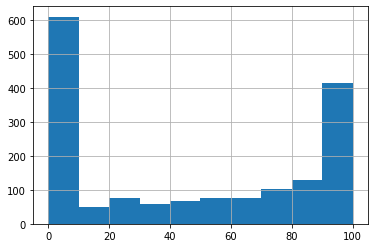

In [8]:
ke_nkr.pra.hist()

In [9]:
matrix = dat_nkr.to_numpy()

In [10]:
# check that there shouldn't be any values on the diagonals
np.diagonal(matrix).sum()

nan

# Simulations

In [11]:
from queue_simulation import Queue     

## Hospital Points

### Dataset

Initialize:
* Hospital dataframe - columns for number of points at each match.
* Points dataframe - number of points that each match will generate.

In [12]:
hospitals = pd.DataFrame(index=ke_nkr.hospital_code.unique())

In [13]:
hospitals['points'] = 0
hospitals

points
CASF-TX       0
CASH-TX       0
COPM-TX       0
UTMC-TX       0
PAUP-TX       0
...         ...
GAMC-TX       0
CACS-TX       0
NVUM-TX       0
CACH-TX       0
CAGH-TX       0

[81 rows x 1 columns]

In [14]:
pts = pd.read_excel("../Data/points.xlsx")
pts

Donor  Patient  0-30  30-80  80-100
0       O     NaN  2.75   2.75    2.75
1       A     NaN  1.00   1.00    1.00
2       B     NaN  1.00   1.00    1.00
3      AB     NaN  1.00   1.00    1.00
4       O       O  0.00  -0.20   -0.50
5       O       A  1.00   0.20    0.00
6       O       B  0.50   0.20    0.00
7       O      AB  1.00   0.20    0.00
8       A       O -1.00  -1.00   -1.00
9       A       A -0.25  -0.50   -1.00
10      A       B  0.10   0.10    0.10
11      A      AB  0.10  -0.10   -0.10
12      B       O -1.00  -1.00   -1.00
13      B       A -0.50  -0.50   -0.50
14      B       B -0.25  -0.50   -1.00
15      B      AB  0.10  -0.10   -0.10
16     AB       O -1.00  -1.00   -1.00
17     AB       A -1.00  -1.00   -1.00
18     AB       B -1.00  -1.00   -1.00
19     AB      AB -0.25  -0.50   -1.00

### Merge points with pair ids

In [15]:
ke_nkr_pts = ke_nkr.merge(pts, how='left', 
                          left_on = ['abo_donor', 'abo_patient'], right_on = ['Donor ', 'Patient'])
ke_nkr_pts['pra_bin'] = pd.cut(ke_nkr_pts.pra, [-1, 30, 80, 100], labels = ['0-30', '30-80', '80-100']).astype('str')
ke_nkr_pts.pra_bin.fillna('0-30', inplace=True)
ke_nkr_pts['points'] = pd.concat([ke_nkr_pts.loc[ke_nkr_pts.pra_bin == i, i] for i in ke_nkr_pts.pra_bin.unique()])
ke_nkr_pts

id hospital_code abo_donor abo_patient   pra platform_code Donor   \
0        0       CASF-TX         A         NaN   NaN           NKR      A   
1        1       CASH-TX         B         NaN   NaN           NKR      B   
2        2       COPM-TX         O         NaN   NaN           NKR      O   
3        3       UTMC-TX         O         NaN   NaN           NKR      O   
4        4       PAUP-TX         O         NaN   NaN           NKR      O   
...    ...           ...       ...         ...   ...           ...    ...   
1894  1894       PAUP-TX         A           O   0.0           NKR      A   
1895  1895       MDUM-TX        AB           O   0.0           NKR     AB   
1896  1896       PAHH-TX         A           A  90.6           NKR      A   
1897  1897       MDUM-TX         B           O   0.0           NKR      B   
1898  1898       DCWR-TX         B           O  99.6           NKR      B   

     Patient  0-30  30-80  80-100 pra_bin  points  
0        NaN  1.00   1.00    1.00    0-30    1.00  
1        NaN  1.00   1.00    1.00    0-30    1.00  
2        NaN  2.75   2.75    2.75    0-30    2.75  
3        NaN  2.75   2.75    2.75    0-30    2.75  
4        NaN  2.75   2.75    2.75    0-30    2.75  
...      ...   ...    ...     ...     ...     ...  
1894       O -1.00  -1.00   -1.00    0-30   -1.00  
1895       O -1.00  -1.00   -1.00    0-30   -1.00  
1896       A -0.25  -0.50   -1.00  80-100   -1.00  
1897       O -1.00  -1.00   -1.00    0-30   -1.00  
1898       O -1.00  -1.00   -1.00  80-100   -1.00  

[1899 rows x 13 columns]

## Plotting

#### Hospital Point Tie-break

In [16]:
hospitals_ts = hospitals.transpose()
hospitals_ts

CASF-TX  CASH-TX  COPM-TX  UTMC-TX  PAUP-TX  PAAG-TX  TXMH-TX  \
points        0        0        0        0        0        0        0   

        GAEM-TX  MDUM-TX  TNMH-TX  ...  ILUI-TX  VAUV-TX  ORGS-TX  CASC-TX  \
points        0        0        0  ...        0        0        0        0   

        TXHS-TX  GAMC-TX  CACS-TX  NVUM-TX  CACH-TX  CAGH-TX  
points        0        0        0        0        0        0  

[1 rows x 81 columns]

In [48]:
def plotting_ts(arrival_rate, departure_rate, compatibility, values, hospital, pairs, num_arrival_goal,
                use_points=True, altruistic=False, three_way=False, color_by=None):
    """
    This function plots the time series of points for each hospital after a number of arrivals to the system.

    Params:
        @arrival_rate: arrival rate of the pairs to the system
        @departure_rate: departure rate of the pairs to the system without matching
        @compatibility: matrix of compatibilities for pairs
        @values: matrix of values for each compatible pair
        @hospital: dataframe of the starting points for each hospital
        @pairs: dataframe of patient-donor pairs in the system, with their corresponding hospitals, blood types, etc.
        @num_arrival_goal: number of arrivals the simulation runs until
        @use_points: if True, breaks ties between matches by using the hospital point system
        @altruistic: if True, finds altruistic chains
        @three_way: if True, finds three-way cycles
        @color_by: color of each hospital line (on a spectrum)
        Can color code by 'points', the number of initial points each hospital has based on their pairs, or
        'ratio', which is the fraction of pairs with positive points that each hospital has, or None.
    
    Returns the dataframe of points for each hospital for each match (number of arrivals that match occurs at is the index).
    """
    
    hp = hospital.copy()
    hospitals_ts = hp.transpose()

    q = Queue(arrival_rate, departure_rate, compatibility, values, hp, pairs)

    q.generate_arrivals_departures(100000)

    while q.num_arrivals < num_arrival_goal:
        q.next_greedy_match(use_points, altruistic, three_way)

        # add points to hospital time series
        hospitals_ts.loc[q.num_arrivals] = q.hospital['points']
    
     
    if color_by:  
        cmap = plt.cm.copper
        norm = colors.Normalize()
        
        if color_by=='points':
            ke_nkr_hospital = pairs.groupby('hospital_code').sum()['points']
        if color_by=='ratio':
            pairs['positive_pts'] = (pairs.points >= 0)
            ke_nkr_hospital = pairs.groupby('hospital_code').sum()['positive_pts'] / pairs.groupby('hospital_code').count()['positive_pts']

        ke_nkr_hospital = ke_nkr_hospital.reindex(ke_nkr_pts.hospital_code.unique())
        hospitals_ts.loc['points'] = ke_nkr_hospital

        hospitals_ts.iloc[1:].plot.line(figsize = (20, 15), legend = False, color=cmap(norm(hospitals_ts.loc['points'])))
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        plt.colorbar(sm)
    else:
        hospitals_ts.iloc[1:].plot.line(figsize = (20, 15), legend = False)

    plt.xlabel("Number of Arrivals")
    plt.ylabel("Points")
    plt.title("Time Series of Points" + " (hospital"*use_points + " (arbitrary"*(not use_points) + " tie-break),"+
              " Altruistic and"*(altruistic)+ " Two-way"*(not three_way)+ " Three-way"*three_way+
              " Matching, by Hospital in NKR")

    plt.show()
        
    return hospitals_ts

### Two-way

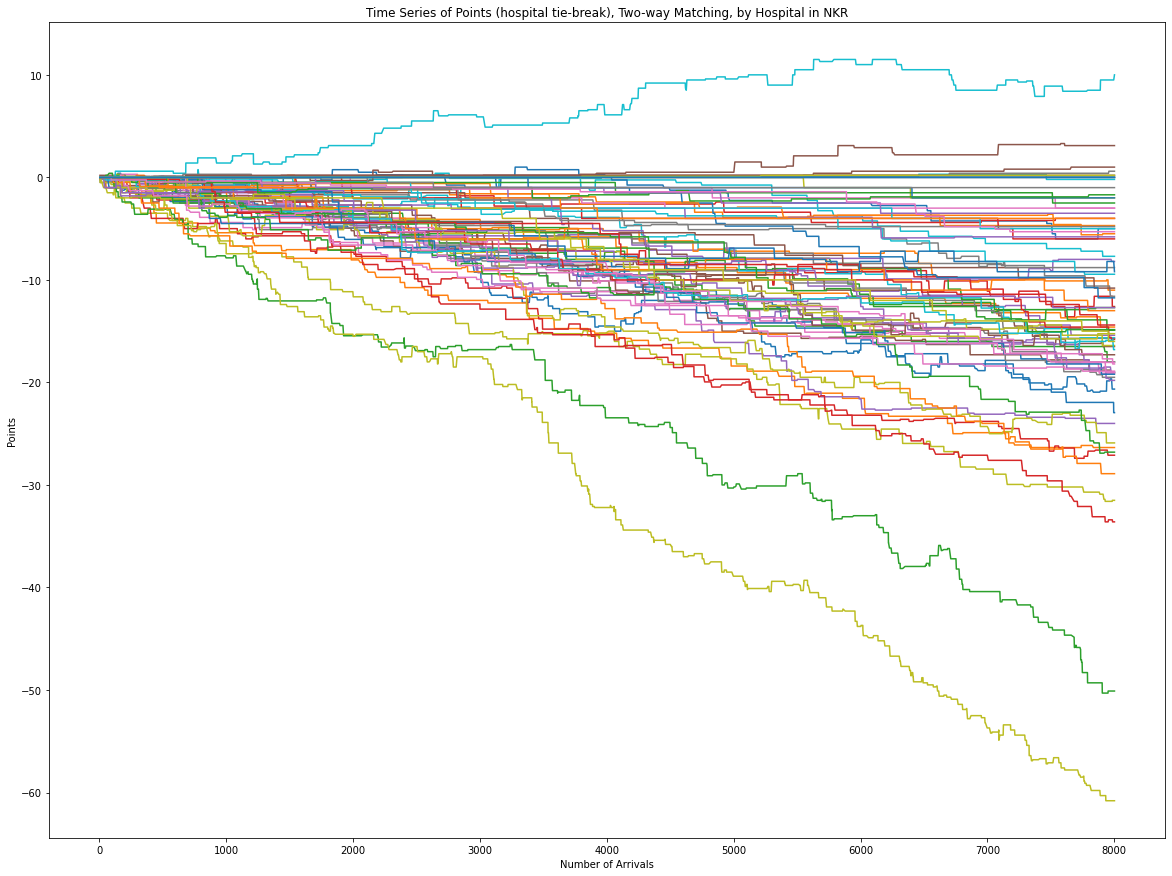

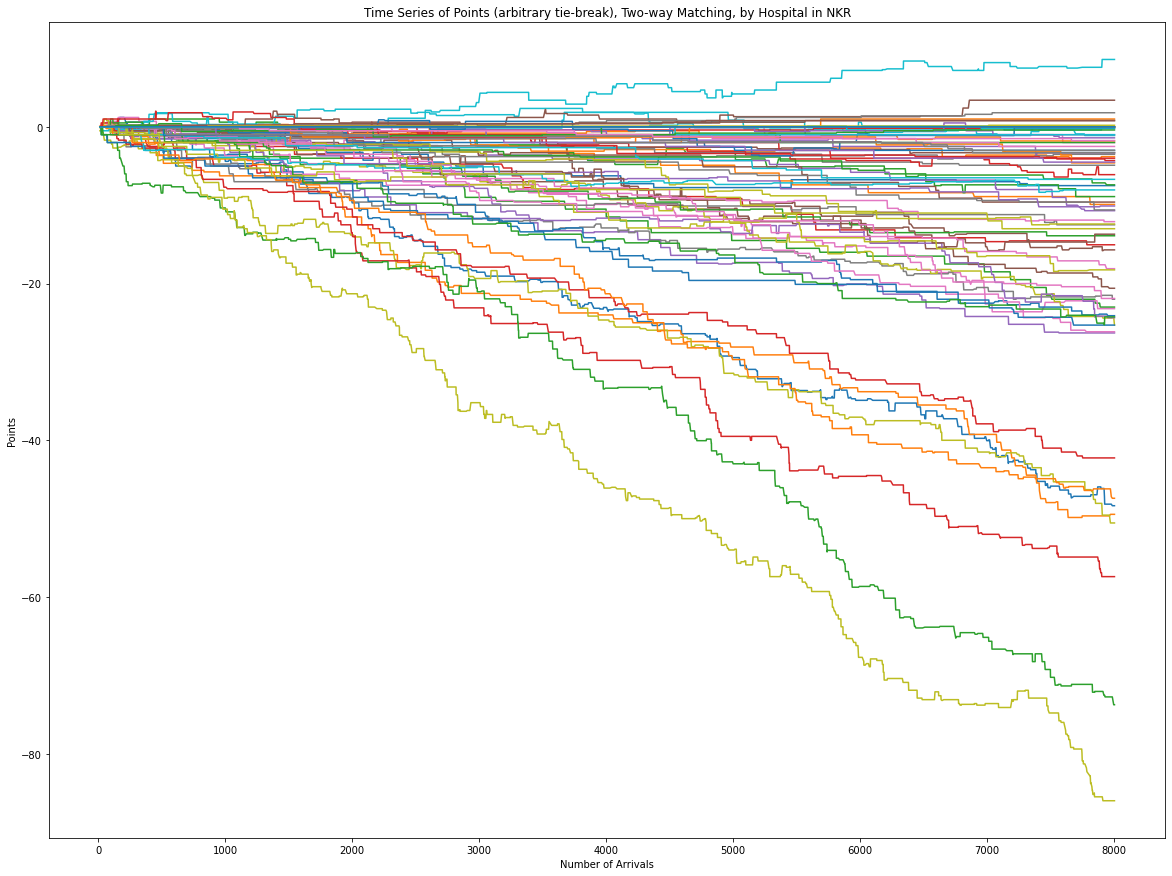

In [18]:
# two_way_points = plotting_ts(365, 1, matrix, np.ones((len(matrix), len(matrix))), hospitals, ke_nkr_pts, 8000,
#                             True, False, False, 'points')
# two_way_ratio = plotting_ts(365, 1, matrix, np.ones((len(matrix), len(matrix))), hospitals, ke_nkr_pts, 8000,
#                             True, False, False, 'ratio')
two_way = plotting_ts(365, 1, matrix, np.ones((len(matrix), len(matrix))), hospitals, ke_nkr_pts, 8000,
                            True, False, False, None)

# two_way_points_rand = plotting_ts(365, 1, matrix, np.ones((len(matrix), len(matrix))), hospitals, ke_nkr_pts, 8000,
#                             False, False, False, 'points')
# two_way_ratio_rand = plotting_ts(365, 1, matrix, np.ones((len(matrix), len(matrix))), hospitals, ke_nkr_pts, 8000,
#                             False, False, False, 'ratio')
two_way_rand = plotting_ts(365, 1, matrix, np.ones((len(matrix), len(matrix))), hospitals, ke_nkr_pts, 8000,
                            False, False, False, None)

### Altruistic and Two-way

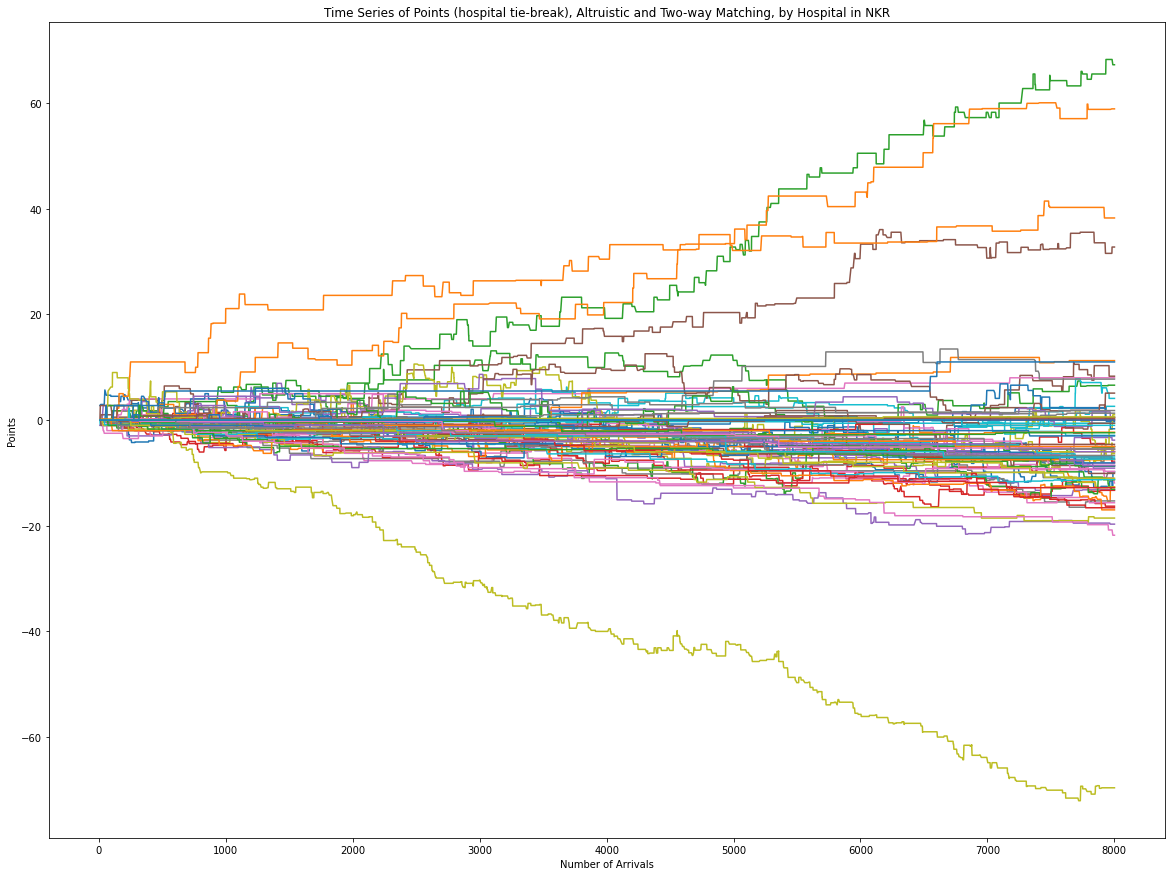

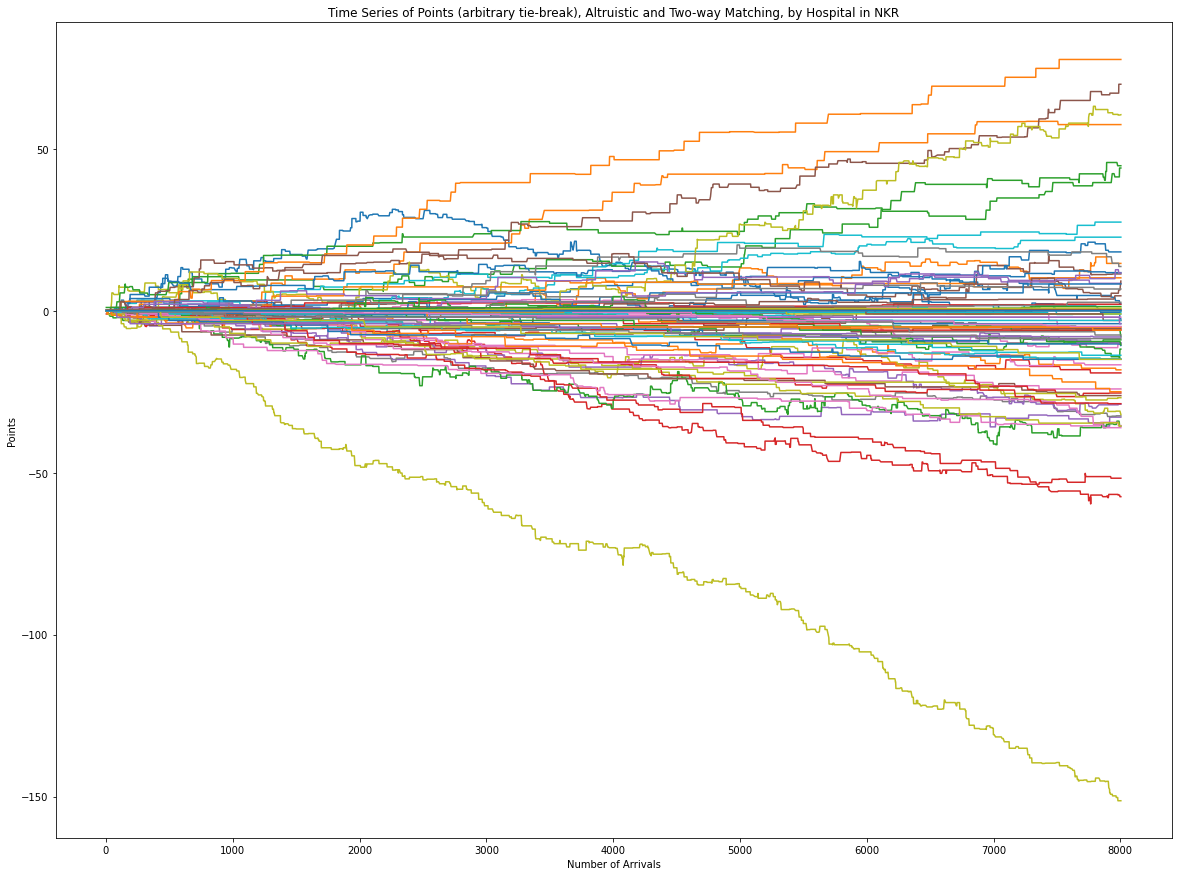

In [20]:
altruistic = plotting_ts(365, 1, matrix, np.ones((len(matrix), len(matrix))), hospitals, ke_nkr_pts, 8000,
                            True, True, False, None)
altruistic_rand = plotting_ts(365, 1, matrix, np.ones((len(matrix), len(matrix))), hospitals, ke_nkr_pts, 8000,
                            False, True, False, None)

Color-coded

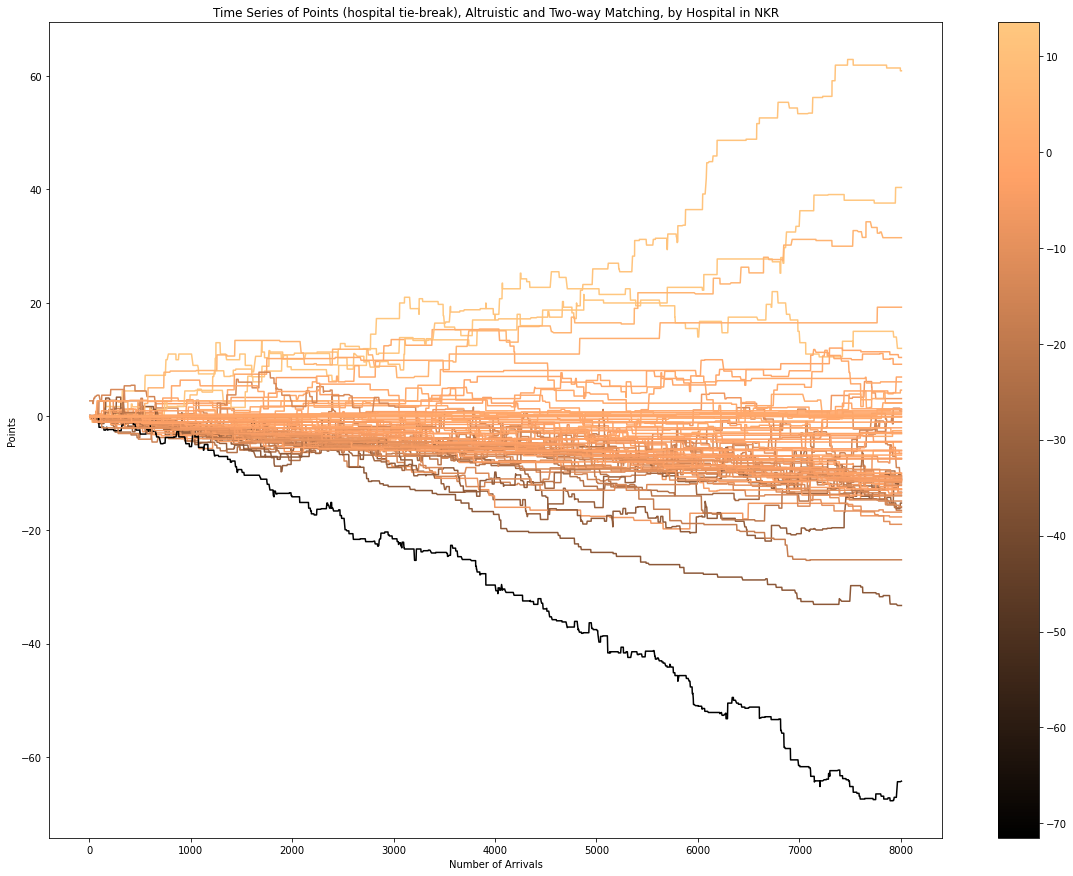

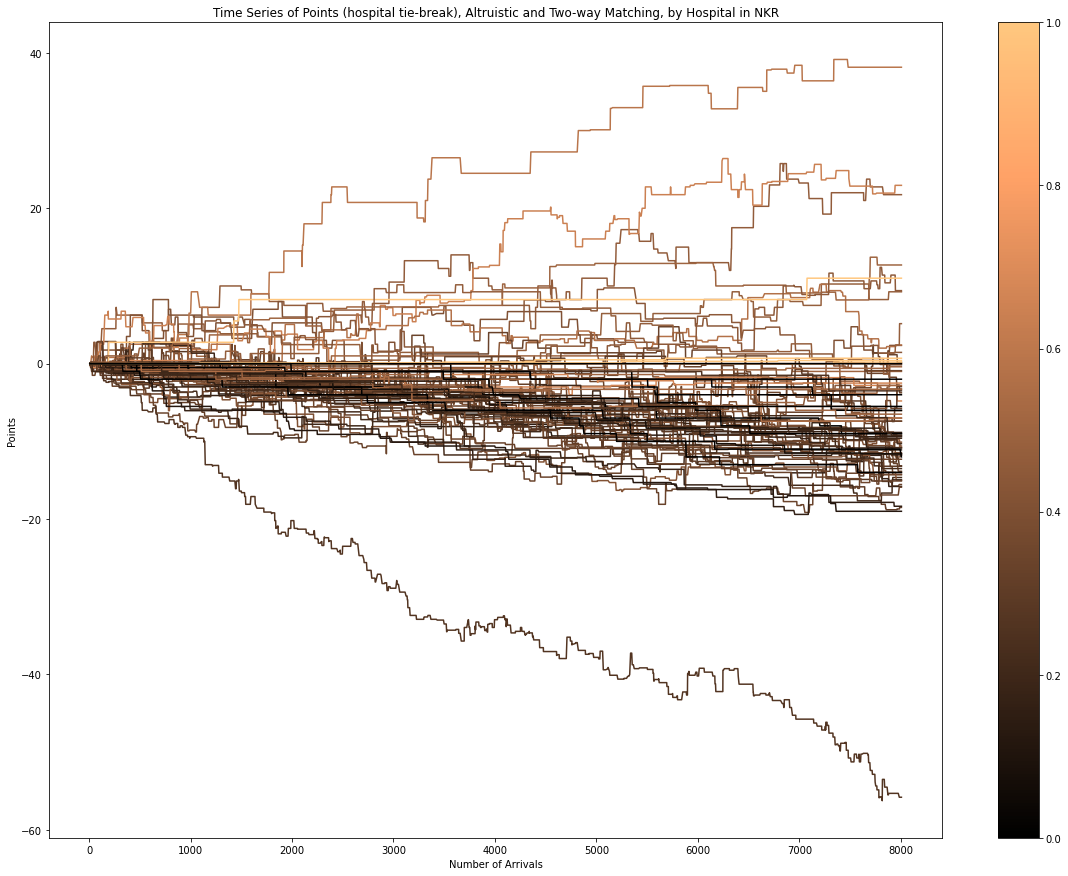

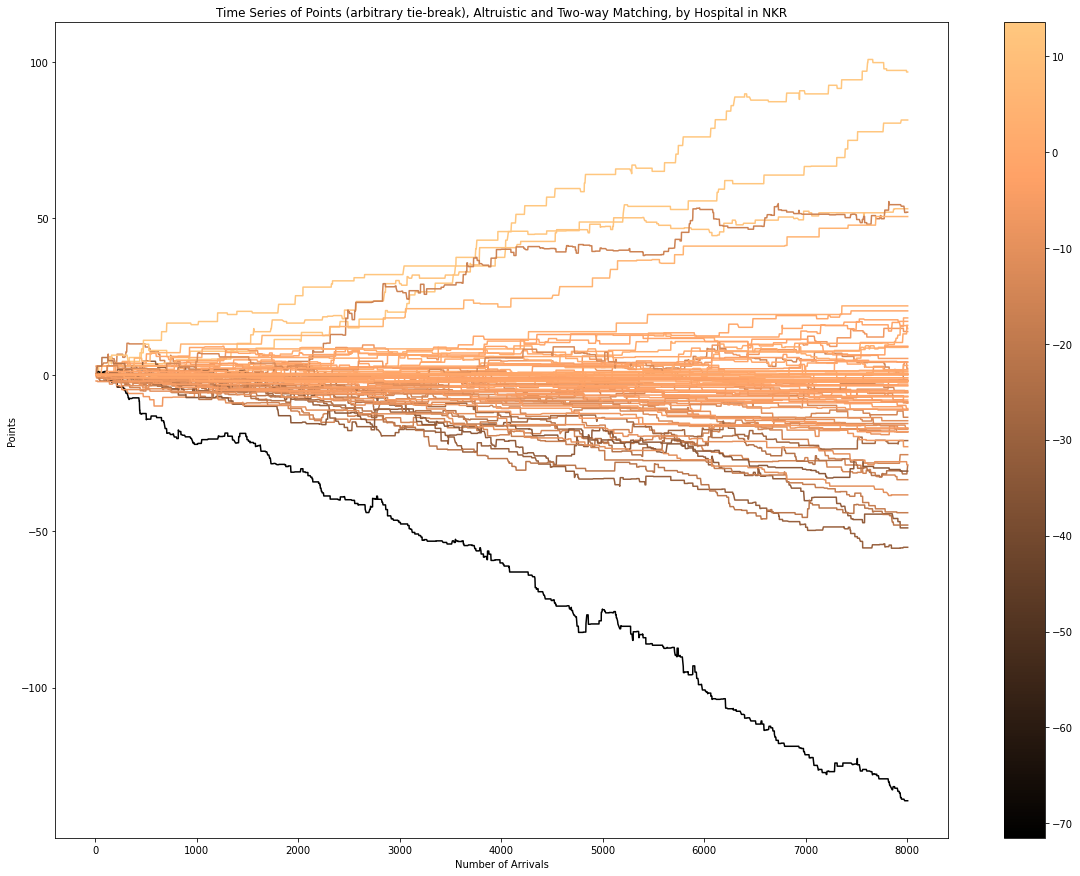

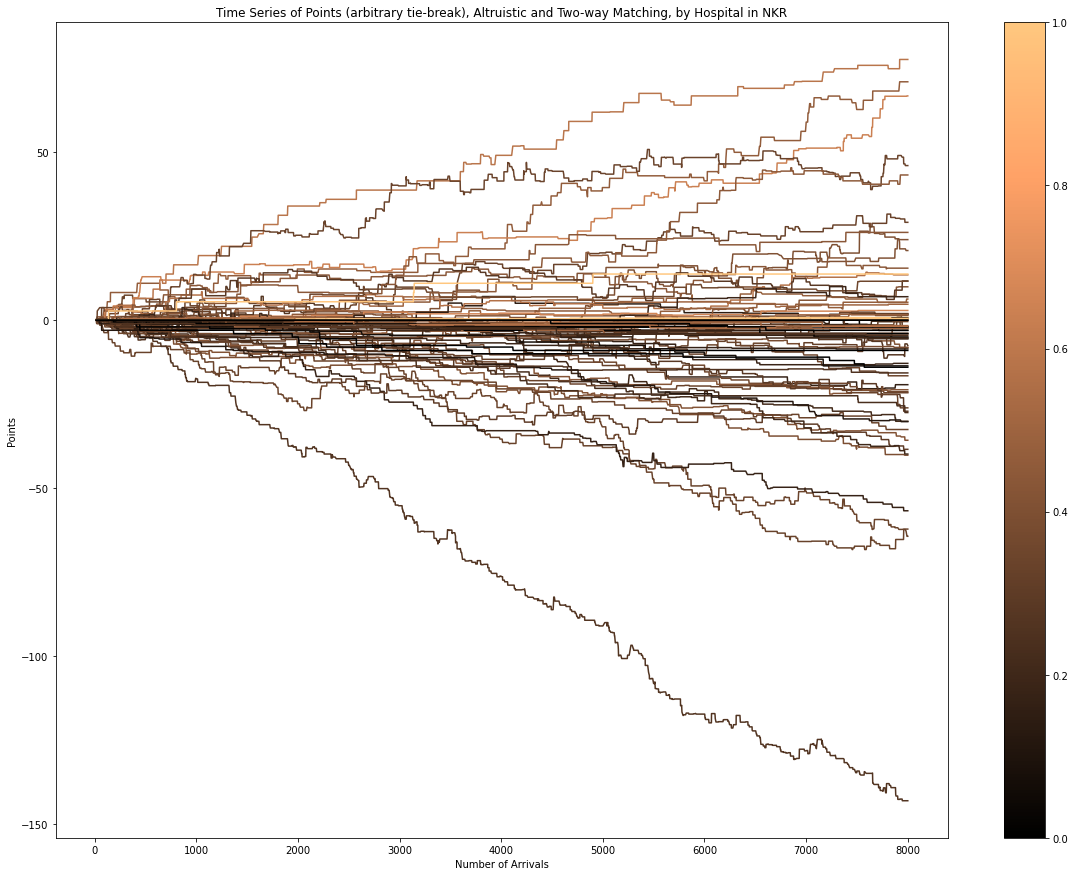

In [49]:
altruistic_points = plotting_ts(365, 1, matrix, np.ones((len(matrix), len(matrix))), hospitals, ke_nkr_pts, 8000,
                            True, True, False, 'points')
altruistic_ratio = plotting_ts(365, 1, matrix, np.ones((len(matrix), len(matrix))), hospitals, ke_nkr_pts, 8000,
                            True, True, False, 'ratio')

altruistic_rand_points = plotting_ts(365, 1, matrix, np.ones((len(matrix), len(matrix))), hospitals, ke_nkr_pts, 8000,
                            False, True, False, 'points')
altruistic_rand_ratio = plotting_ts(365, 1, matrix, np.ones((len(matrix), len(matrix))), hospitals, ke_nkr_pts, 8000,
                            False, True, False, 'ratio')

### Altruistic and three-way

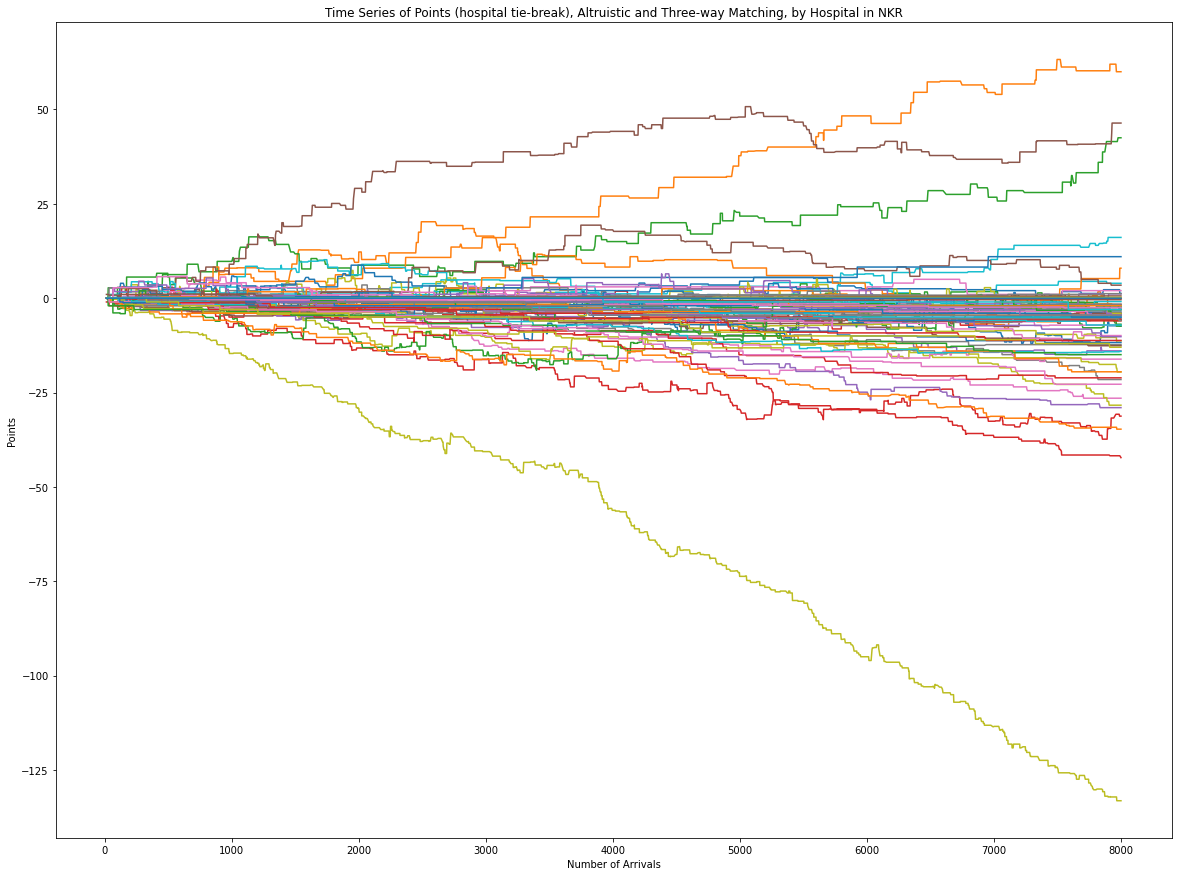

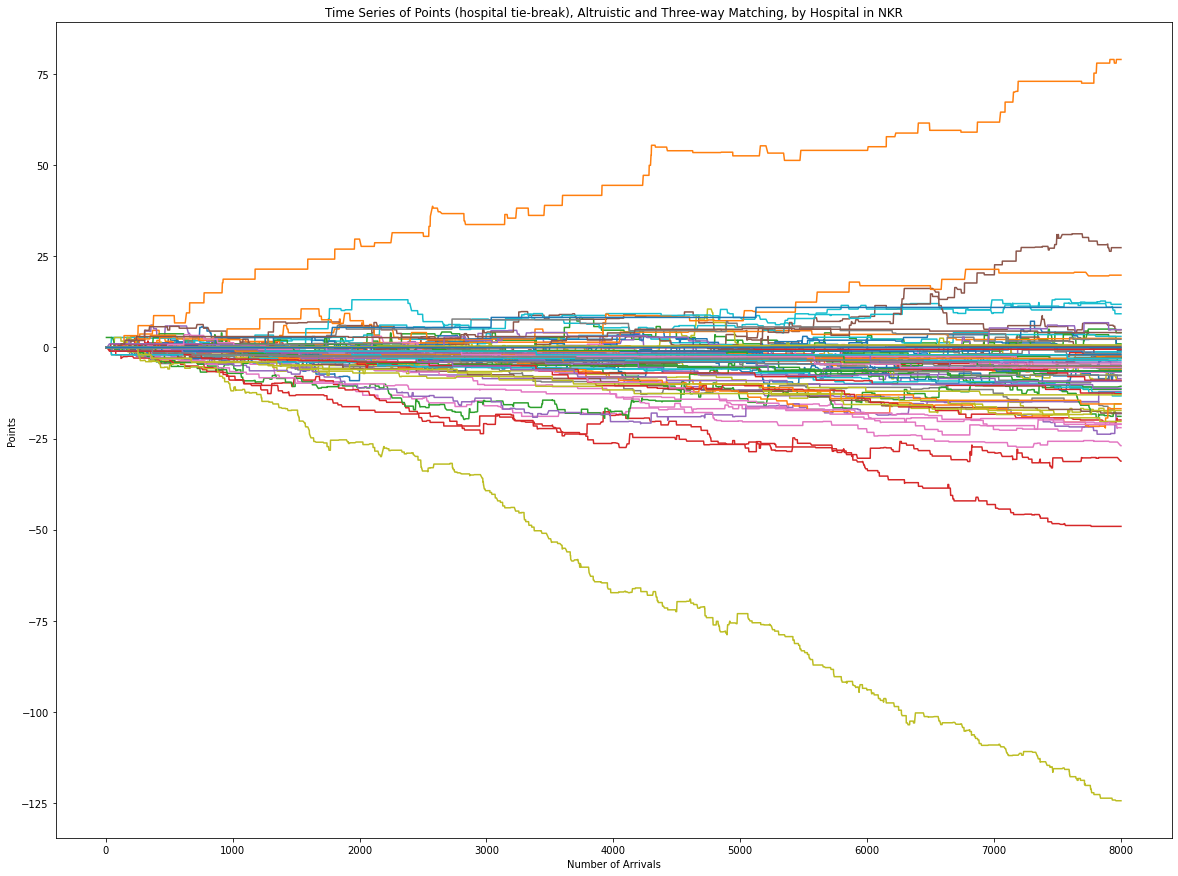

In [18]:
three_way = plotting_ts(365, 1, matrix, np.ones((len(matrix), len(matrix))), hospitals, ke_nkr_pts, 8000,
                        True, True, True, None)

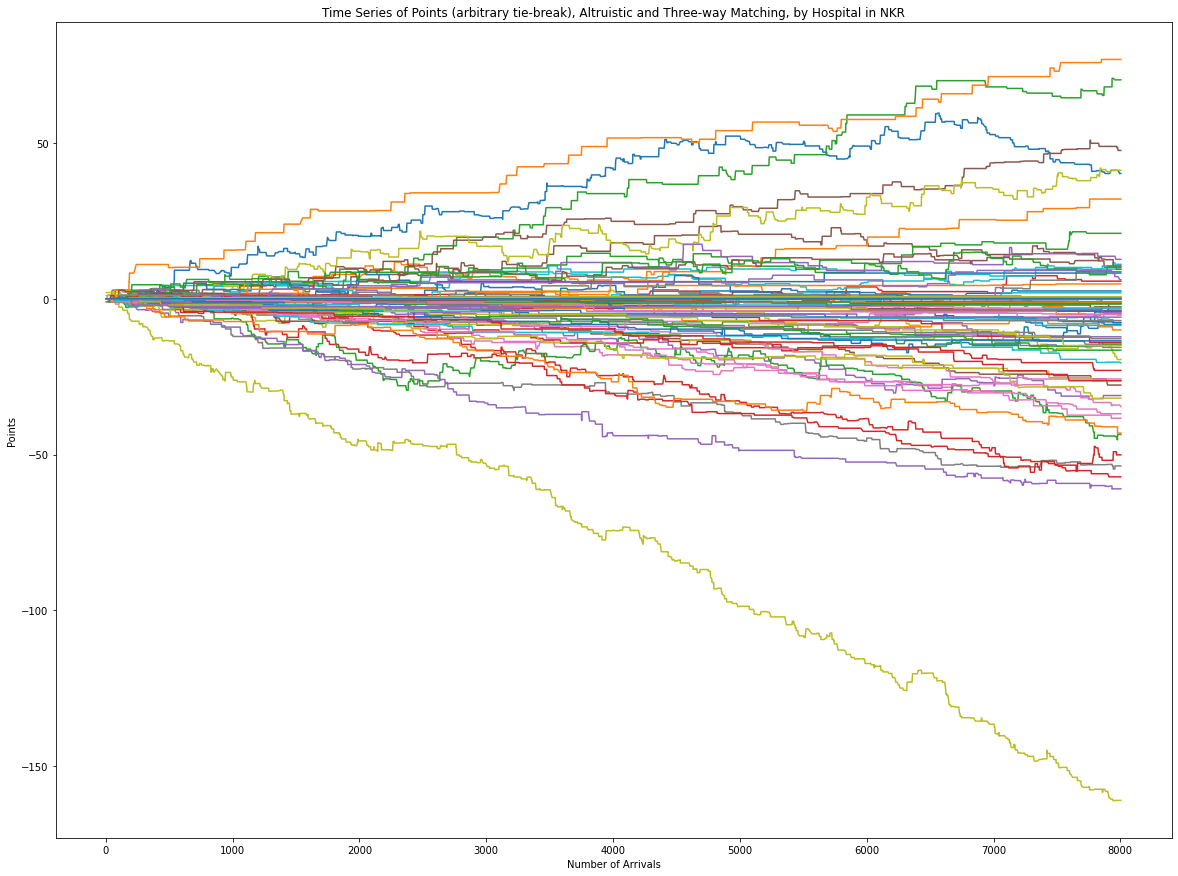

In [18]:
three_way_rand = plotting_ts(365, 1, matrix, np.ones((len(matrix), len(matrix))), hospitals, ke_nkr_pts, 8000,
                             False, True, True, None)

Color-coded

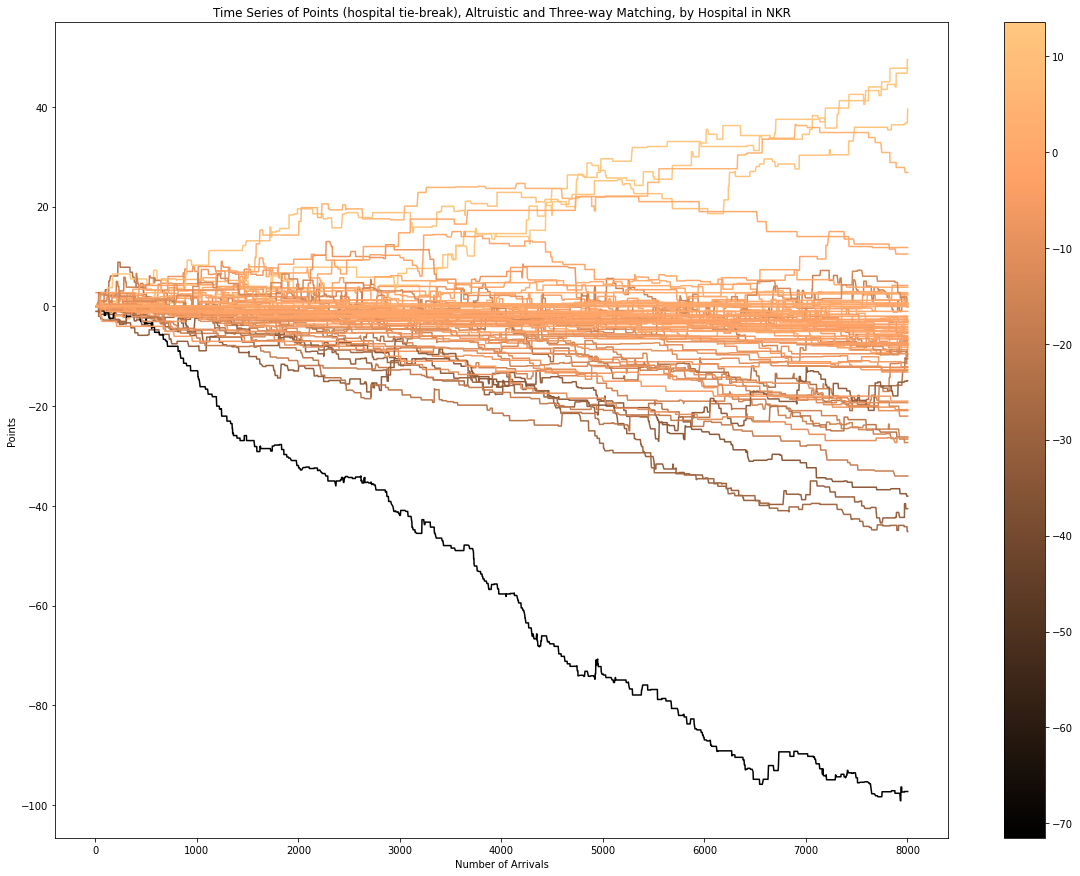

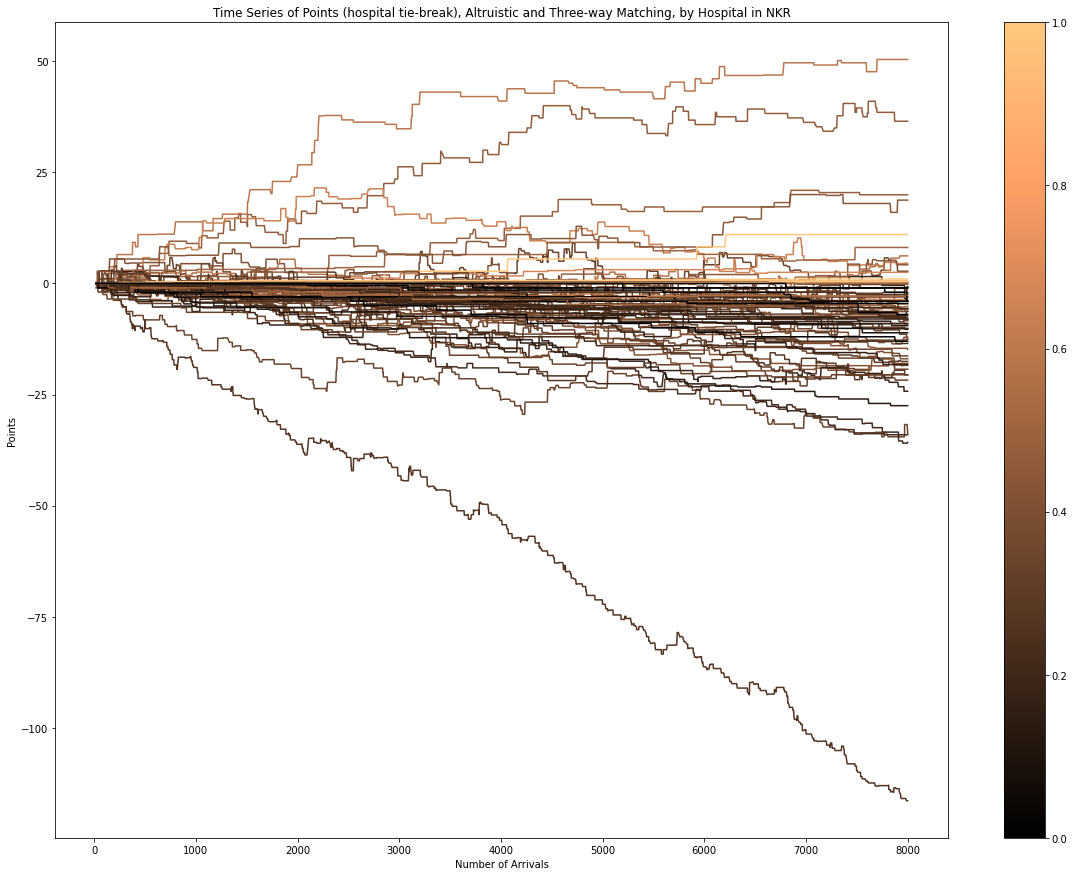

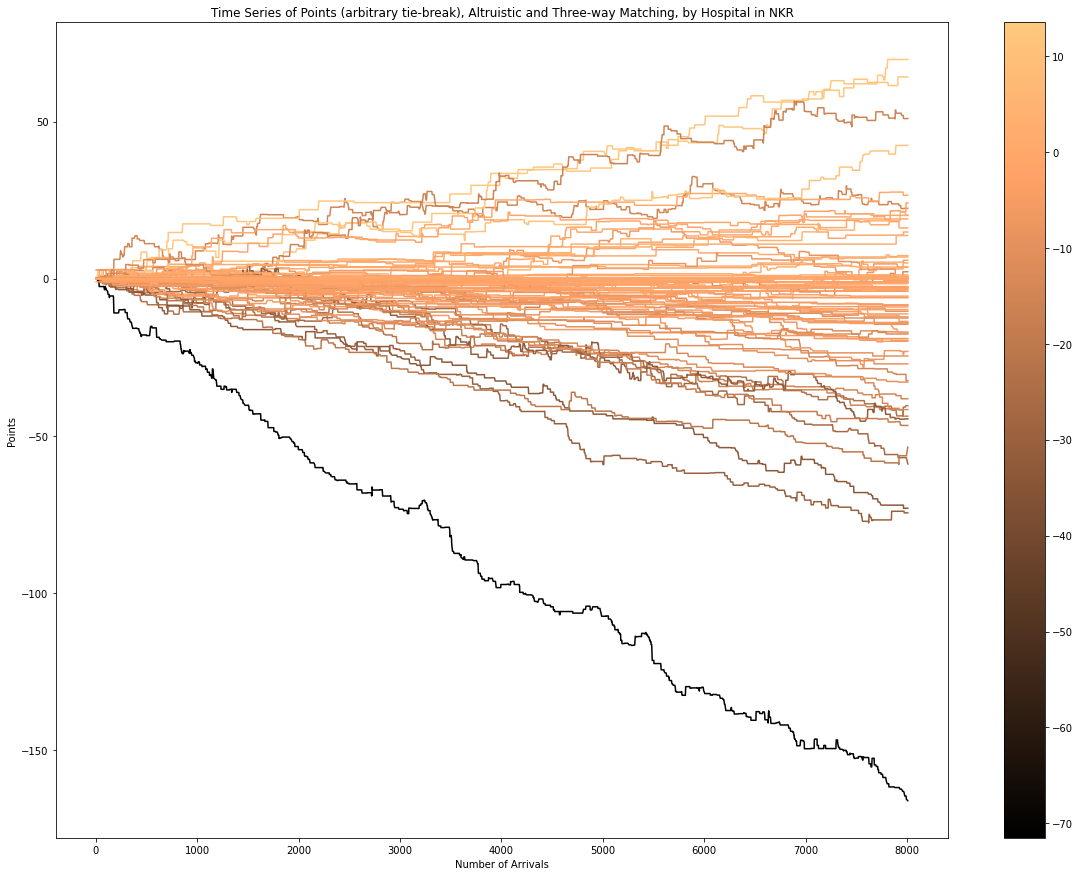

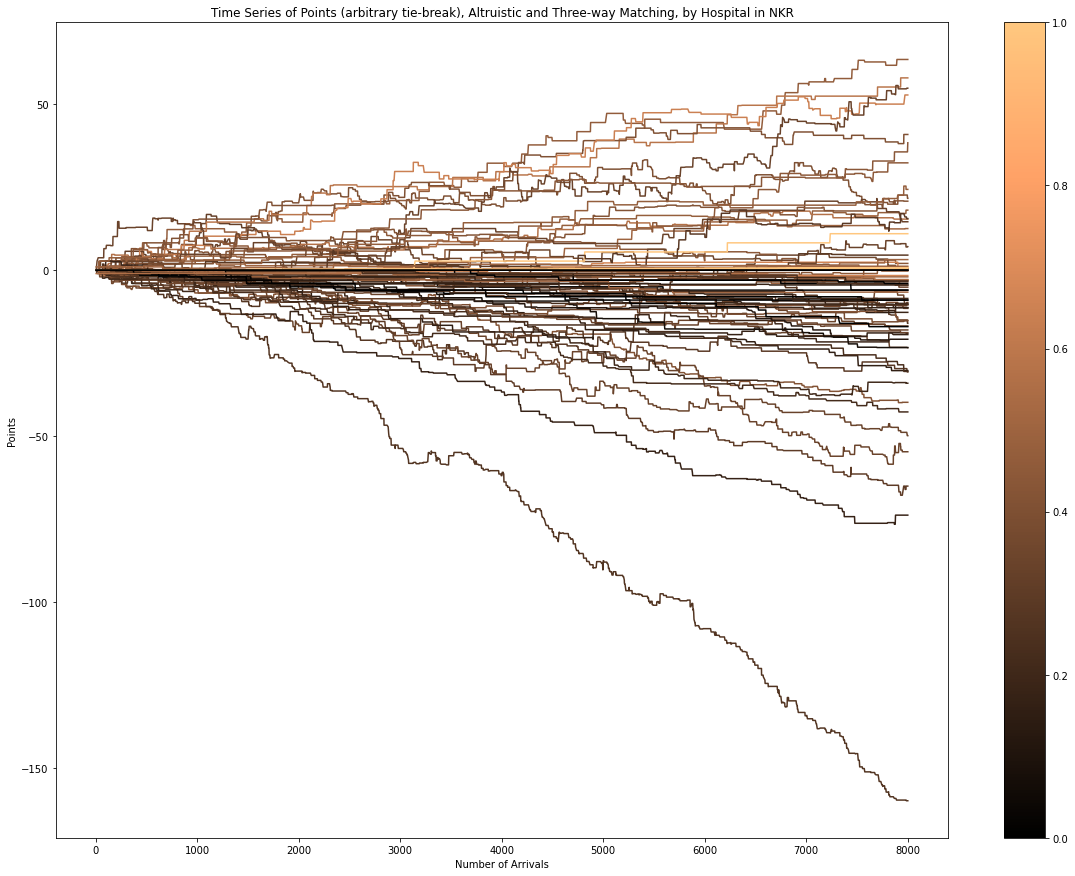

In [50]:
three_way_points = plotting_ts(365, 1, matrix, np.ones((len(matrix), len(matrix))), hospitals, ke_nkr_pts, 8000,
                            True, True, True, 'points')
three_way_ratio = plotting_ts(365, 1, matrix, np.ones((len(matrix), len(matrix))), hospitals, ke_nkr_pts, 8000,
                            True, True, True, 'ratio')

three_way_rand_points = plotting_ts(365, 1, matrix, np.ones((len(matrix), len(matrix))), hospitals, ke_nkr_pts, 8000,
                            False, True, True, 'points')
three_way_rand_ratio = plotting_ts(365, 1, matrix, np.ones((len(matrix), len(matrix))), hospitals, ke_nkr_pts, 8000,
                            False, True, True, 'ratio')

## Archived: Plotting

In [17]:
q = Queue(arrival_rate=365, departure_rate=1, compatibility=matrix, values=np.ones((len(matrix), len(matrix))),
          hospital = hospitals, pairs = ke_nkr_pts)

pool_len_oa = pd.Series([])
pool_len_ao = pd.Series([])
matches_oa = pd.Series([])
matches_ao = pd.Series([])

start_time = datetime.now()
        
q.generate_arrivals_departures(100000)

#         print("matching...")
    
while q.num_arrivals < 5000:
    q.next_greedy_match(use_points=True, altruistic=False, three_way=False)
    pool_len_oa[q.num_arrivals] = len(ke_nkr_pts.loc[ke_nkr_pts.id.isin(q.current) & (ke_nkr_pts.abo_donor == 'O')])
    pool_len_ao[q.num_arrivals] = len(ke_nkr_pts.loc[ke_nkr_pts.id.isin(q.current) & (ke_nkr_pts.abo_donor == 'A')])
    matches_oa[q.num_arrivals] = len(ke_nkr_pts.loc[list(sum(q.matches,()))].loc[ke_nkr_pts.abo_donor == 'O'])
    matches_ao[q.num_arrivals] = len(ke_nkr_pts.loc[list(sum(q.matches,()))].loc[ke_nkr_pts.abo_donor == 'A'])

    # add points to hospital time series
    hospitals_ts.loc[q.num_arrivals] = q.hospital['points']

end_time = datetime.now()

hospitals_ts
#         print("time for ", queue_init.num_arrivals, "arrivals and ", len(q.matches), "matches:", end_time - start_time)

<ipython-input-17-41f9f89bbc91>:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pool_len_oa = pd.Series([])
<ipython-input-17-41f9f89bbc91>:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pool_len_ao = pd.Series([])
<ipython-input-17-41f9f89bbc91>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  matches_oa = pd.Series([])
<ipython-input-17-41f9f89bbc91>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  matches_ao = pd.Series([])


CASF-TX  CASH-TX  COPM-TX  UTMC-TX  PAUP-TX  PAAG-TX  TXMH-TX  \
points      0.0     0.00      0.0      0.0      0.0     0.00      0.0   
16          0.0     0.00      0.0      0.0      0.0     0.00      0.0   
17          0.0     0.00      0.0      0.0      0.0     0.00      0.0   
19          0.0    -0.50      0.0      0.0      0.0     0.00      0.0   
28          0.0    -0.50      0.0      0.0      0.0     0.00      0.0   
...         ...      ...      ...      ...      ...      ...      ...   
4987      -15.7   -15.55    -11.5    -10.0    -15.8   -14.45     -9.3   
4991      -15.7   -15.55    -11.5    -10.0    -15.8   -15.45     -9.3   
4995      -15.7   -15.55    -11.5    -10.0    -15.8   -15.45     -9.3   
4997      -15.7   -15.55    -11.5    -10.0    -15.8   -15.45     -9.3   
5023      -15.7   -15.55    -11.5    -10.0    -15.8   -15.45     -9.3   

        GAEM-TX  MDUM-TX  TNMH-TX  ...  ILUI-TX  VAUV-TX  ORGS-TX  CASC-TX  \
points     0.00     0.00      0.0  ...      0.0      0.0      0.0      0.0   
16         0.00     0.00      0.0  ...      0.0      0.0      0.0      0.0   
17         0.00     0.00      0.0  ...      0.0      0.0      0.0      0.0   
19         0.00     0.00      0.0  ...      0.0      0.0      0.0      0.0   
28         0.00     0.00      0.0  ...      0.0      0.0      0.0      0.0   
...         ...      ...      ...  ...      ...      ...      ...      ...   
4987     -13.75   -21.35      0.9  ...     -2.0     -1.4      0.0     -1.0   
4991     -13.75   -21.35      0.9  ...     -2.0     -1.4      0.0     -1.0   
4995     -13.75   -21.35      0.9  ...     -2.0     -1.4      0.0     -1.0   
4997     -14.25   -21.35      0.9  ...     -2.0     -1.4      0.0     -1.0   
5023     -14.25   -21.35      0.9  ...     -2.0     -1.4      0.0     -1.0   

        TXHS-TX  GAMC-TX  CACS-TX  NVUM-TX  CACH-TX  CAGH-TX  
points      0.0     0.00      0.0      0.0      0.0      0.0  
16          0.0     0.00      0.0      0.0      0.0      0.0  
17          0.0     0.00      0.0      0.0      0.0      0.0  
19          0.0     0.00      0.0      0.0      0.0      0.0  
28          0.0     0.00      0.0      0.0      0.0      0.0  
...         ...      ...      ...      ...      ...      ...  
4987        0.2    -5.65     -1.5      0.2      0.0      0.0  
4991        0.2    -5.65     -1.5      0.2      0.0      0.0  
4995        0.2    -5.65     -1.5      0.2      0.0      0.0  
4997        0.2    -5.65     -1.5      0.2      0.0      0.0  
5023        0.2    -5.65     -1.5      0.2      0.0      0.0  

[1141 rows x 81 columns]

In [18]:
print(ke_nkr.loc[list(sum(q.matches,()))].value_counts('abo_donor'))
print(ke_nkr.loc[list(sum(q.matches,()))].value_counts('abo_patient'))

abo_donor
O     1022
A      807
B      411
AB      40
dtype: int64
abo_patient
O     962
A     796
B     447
AB     75
dtype: int64


In [19]:
q.num_transplants

2280

Text(0.5, 1.0, 'O-A')

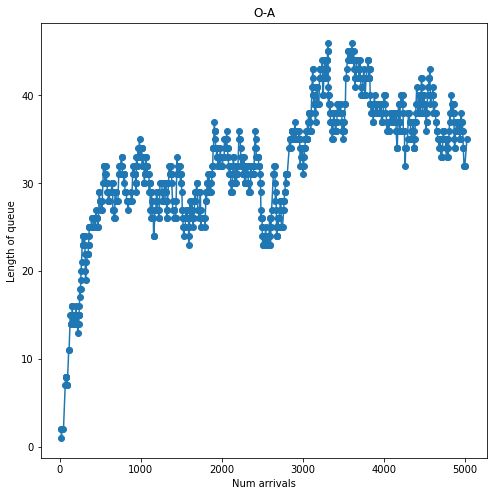

In [20]:
plt.figure(figsize = (8, 8))
pool_len_oa.plot(marker = 'o')
plt.xlabel("Num arrivals")
plt.ylabel("Length of queue")
plt.title("O-A")

Text(0.5, 1.0, 'A-O')

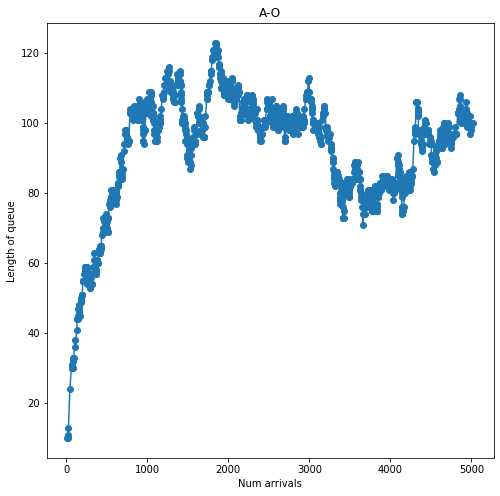

In [21]:
plt.figure(figsize = (8, 8))
pool_len_ao.plot(marker = 'o')
plt.xlabel("Num arrivals")
plt.ylabel("Length of queue")
plt.title("A-O")

Text(0.5, 1.0, 'O-A')

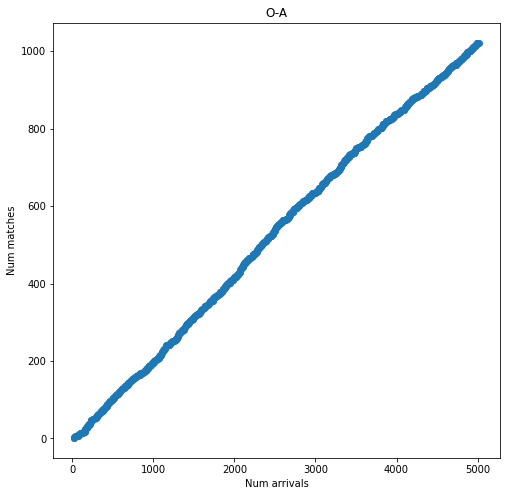

In [22]:
plt.figure(figsize = (8, 8))
matches_oa.plot(marker = 'o')
plt.xlabel("Num arrivals")
plt.ylabel("Num matches")
plt.title("O-A")

Text(0.5, 1.0, 'A-O')

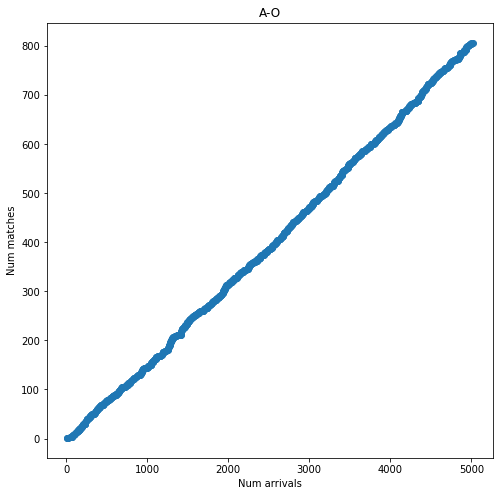

In [23]:
plt.figure(figsize = (8, 8))
matches_ao.plot(marker = 'o')
plt.xlabel("Num arrivals")
plt.ylabel("Num matches")
plt.title("A-O")

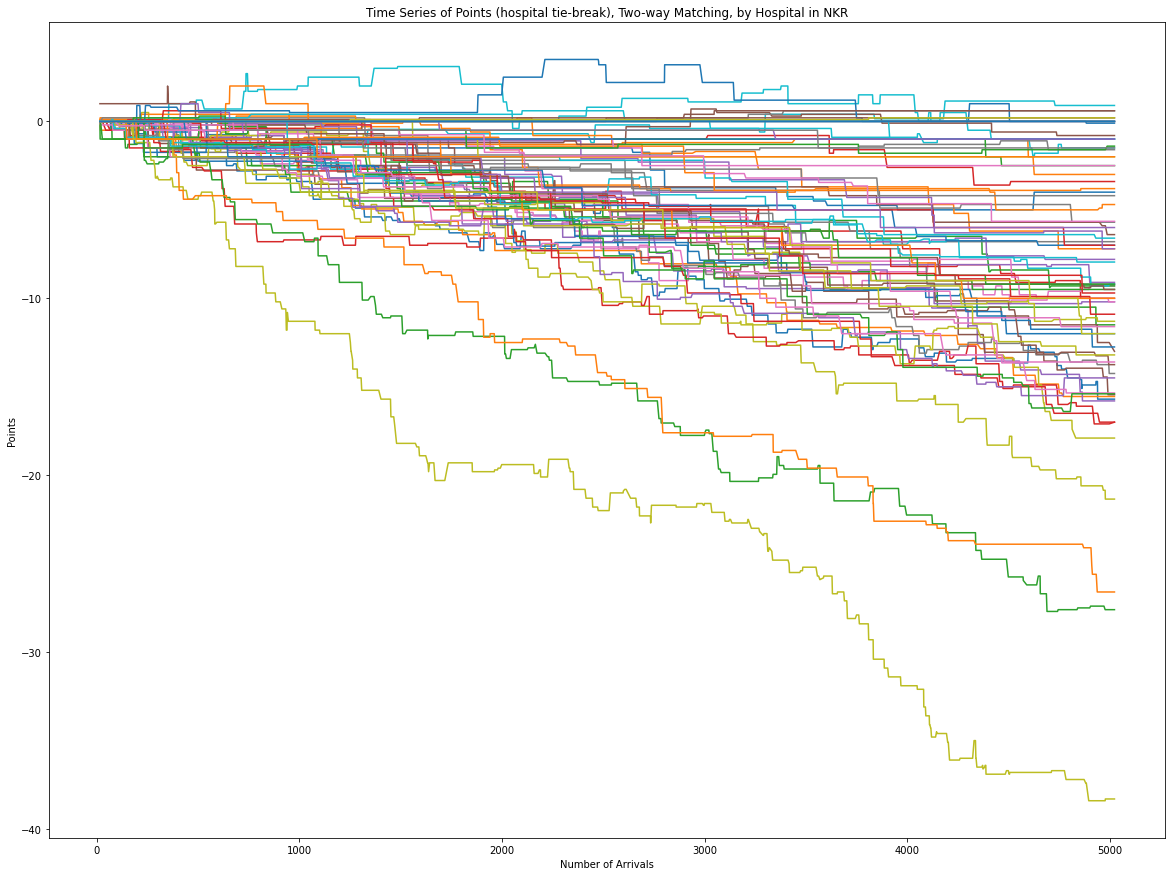

In [24]:
hospitals_ts.iloc[1:].plot.line(figsize = (20, 15), legend = False)
plt.xlabel("Number of Arrivals")
plt.ylabel("Points")
plt.title("Time Series of Points (hospital tie-break), Two-way Matching, by Hospital in NKR")
plt.show()

#### Random tie-break

In [25]:
hospitals_a = pd.DataFrame(index=ke_nkr.hospital_code.unique())
hospitals_a['points'] = 0
hospitals_ts_a = hospitals_a.transpose()

q_a = Queue(arrival_rate=200, departure_rate=1, compatibility=matrix, values=np.ones((len(matrix), len(matrix))),
          hospital = hospitals_a, pairs = ke_nkr_pts)
        
q_a.generate_arrivals_departures(100000)
    
while q_a.num_arrivals < 5000:
    q_a.next_greedy_match(use_points=False, altruistic=False, three_way=False)
    
    # add points to hospital time series
    hospitals_ts_a.loc[q_a.num_arrivals] = q_a.hospital['points']

hospitals_ts_a

CASF-TX  CASH-TX  COPM-TX  UTMC-TX  PAUP-TX  PAAG-TX  TXMH-TX  \
points     0.00      0.0      0.0      0.0      0.0      0.0      0.0   
10         0.00      0.0      0.0      0.0      0.0      0.0      0.0   
14         0.00      0.0      0.0      0.0      0.0      0.0      0.0   
17        -1.00      0.0      0.0      0.0      0.0      0.0      0.0   
21        -1.00      0.0      0.0      0.0      0.0      0.0      0.0   
...         ...      ...      ...      ...      ...      ...      ...   
4988     -23.55    -17.9    -10.0     -0.4    -10.5    -15.3     -8.3   
4989     -23.55    -17.9    -10.0     -0.4    -10.5    -15.3     -8.3   
4993     -23.55    -17.9    -10.0     -0.4    -10.5    -15.3     -8.3   
4994     -23.55    -17.9    -10.0     -0.4    -10.5    -15.3     -8.3   
5002     -23.55    -17.9    -10.0     -0.4    -10.5    -15.3     -8.5   

        GAEM-TX  MDUM-TX  TNMH-TX  ...  ILUI-TX  VAUV-TX  ORGS-TX  CASC-TX  \
points     0.00     0.00     0.00  ...      0.0      0.0      0.0      0.0   
10         0.00     1.00     0.00  ...      0.0      0.0      0.0      0.0   
14         0.00     1.00     0.00  ...      0.0      0.0      0.0      0.0   
17         0.00     1.00     0.00  ...      0.0      0.0      0.0      0.0   
21         0.00     1.00     0.00  ...      0.0      0.0      0.0      0.0   
...         ...      ...      ...  ...      ...      ...      ...      ...   
4988     -18.55   -34.45    -2.35  ...      0.0     -2.4      0.0     -1.5   
4989     -18.55   -34.45    -2.35  ...      0.0     -2.4      0.0     -1.5   
4993     -18.55   -34.45    -2.35  ...      0.0     -2.4      0.0     -1.5   
4994     -18.55   -34.45    -2.35  ...      0.0     -2.4      0.0     -1.5   
5002     -18.55   -34.65    -2.35  ...      0.0     -2.4      0.0     -1.5   

        TXHS-TX  GAMC-TX  CACS-TX  NVUM-TX  CACH-TX  CAGH-TX  
points      0.0     0.00      0.0      0.0      0.0      0.0  
10          0.0     0.00      0.0      0.0      0.0      0.0  
14          0.0     0.00      0.0      0.0      0.0      0.0  
17          0.0     0.00      0.0      0.0      0.0      0.0  
21          0.0     0.00      0.0      0.0      0.0      0.0  
...         ...      ...      ...      ...      ...      ...  
4988        0.4    -1.75      0.0      0.1      0.0      0.0  
4989        0.4    -1.75      0.0      0.1      0.0      0.0  
4993        0.4    -1.75      0.0      0.1      0.0      0.0  
4994        0.4    -1.75      0.0      0.1      0.0      0.0  
5002        0.4    -1.75      0.0      0.1      0.0      0.0  

[1078 rows x 81 columns]

In [26]:
q_a.num_transplants

2154

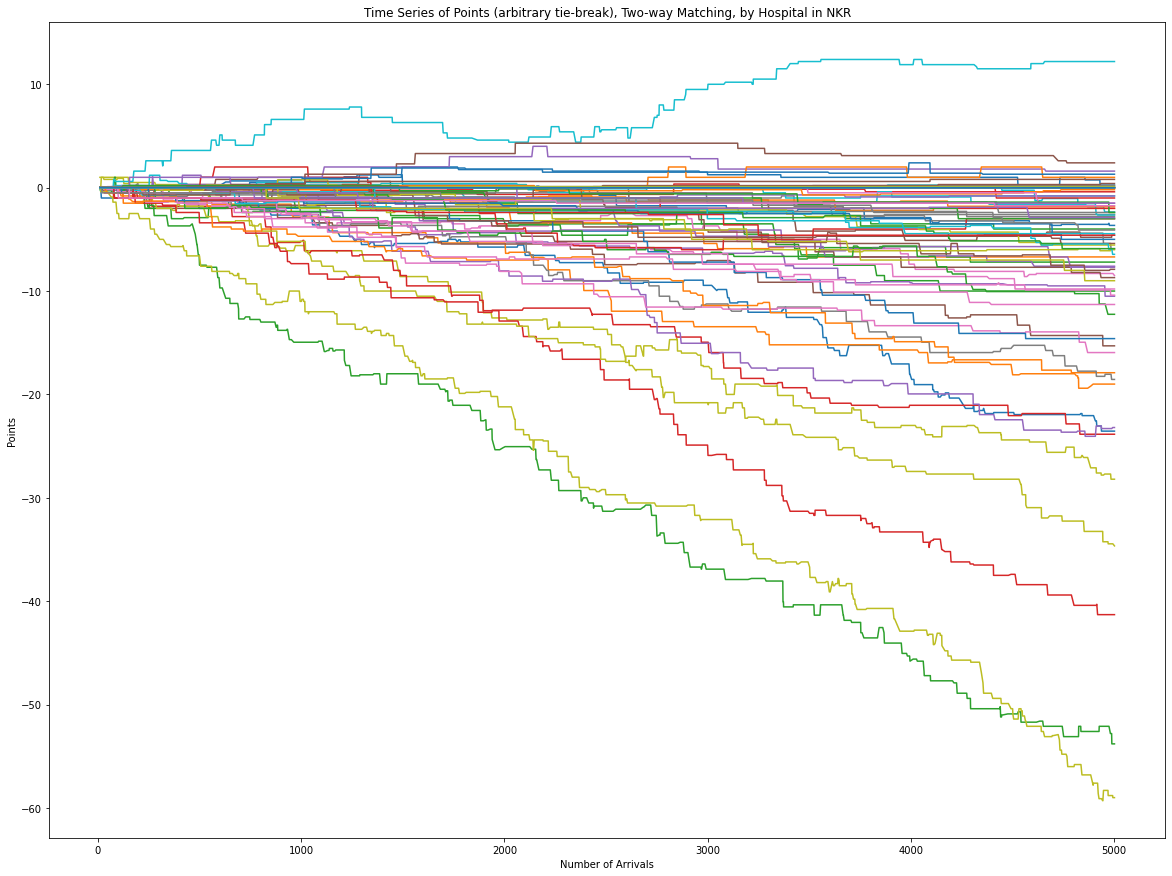

In [27]:
hospitals_ts_a.iloc[1:].plot.line(figsize = (20, 15), legend = False)
plt.xlabel("Number of Arrivals")
plt.ylabel("Points")
plt.title("Time Series of Points (arbitrary tie-break), Two-way Matching, by Hospital in NKR")
plt.show()

#### Color-coded by points

In [28]:
ke_nkr_hospital = ke_nkr_pts.groupby('hospital_code').sum()['points']
ke_nkr_hospital

hospital_code
           12.60
CACH-TX    -1.00
CACS-TX    -4.50
CAGH-TX    -1.00
CALL-TX   -10.40
           ...  
VTMC-TX    -0.80
WAUW-TX     0.95
WISE-TX    -9.65
WISL-TX     0.70
WIUW-TX   -16.30
Name: points, Length: 81, dtype: float64

In [29]:
ke_nkr_hospital = ke_nkr_hospital.reindex(ke_nkr_pts.hospital_code.unique())

In [30]:
hospitals_ts.loc['points'] = ke_nkr_hospital
hospitals_ts

CASF-TX  CASH-TX  COPM-TX  UTMC-TX  PAUP-TX  PAAG-TX  TXMH-TX  \
points   -14.45    -6.60     13.5     -3.9   -14.95    -6.45    -15.0   
16         0.00     0.00      0.0      0.0     0.00     0.00      0.0   
17         0.00     0.00      0.0      0.0     0.00     0.00      0.0   
19         0.00    -0.50      0.0      0.0     0.00     0.00      0.0   
28         0.00    -0.50      0.0      0.0     0.00     0.00      0.0   
...         ...      ...      ...      ...      ...      ...      ...   
4987     -15.70   -15.55    -11.5    -10.0   -15.80   -14.45     -9.3   
4991     -15.70   -15.55    -11.5    -10.0   -15.80   -15.45     -9.3   
4995     -15.70   -15.55    -11.5    -10.0   -15.80   -15.45     -9.3   
4997     -15.70   -15.55    -11.5    -10.0   -15.80   -15.45     -9.3   
5023     -15.70   -15.55    -11.5    -10.0   -15.80   -15.45     -9.3   

        GAEM-TX  MDUM-TX  TNMH-TX  ...  ILUI-TX  VAUV-TX  ORGS-TX  CASC-TX  \
points   -14.80   -22.70     -0.7  ...     -3.0     -3.2     -0.5     -2.0   
16         0.00     0.00      0.0  ...      0.0      0.0      0.0      0.0   
17         0.00     0.00      0.0  ...      0.0      0.0      0.0      0.0   
19         0.00     0.00      0.0  ...      0.0      0.0      0.0      0.0   
28         0.00     0.00      0.0  ...      0.0      0.0      0.0      0.0   
...         ...      ...      ...  ...      ...      ...      ...      ...   
4987     -13.75   -21.35      0.9  ...     -2.0     -1.4      0.0     -1.0   
4991     -13.75   -21.35      0.9  ...     -2.0     -1.4      0.0     -1.0   
4995     -13.75   -21.35      0.9  ...     -2.0     -1.4      0.0     -1.0   
4997     -14.25   -21.35      0.9  ...     -2.0     -1.4      0.0     -1.0   
5023     -14.25   -21.35      0.9  ...     -2.0     -1.4      0.0     -1.0   

        TXHS-TX  GAMC-TX  CACS-TX  NVUM-TX  CACH-TX  CAGH-TX  
points      0.1    -2.35     -4.5      0.1     -1.0     -1.0  
16          0.0     0.00      0.0      0.0      0.0      0.0  
17          0.0     0.00      0.0      0.0      0.0      0.0  
19          0.0     0.00      0.0      0.0      0.0      0.0  
28          0.0     0.00      0.0      0.0      0.0      0.0  
...         ...      ...      ...      ...      ...      ...  
4987        0.2    -5.65     -1.5      0.2      0.0      0.0  
4991        0.2    -5.65     -1.5      0.2      0.0      0.0  
4995        0.2    -5.65     -1.5      0.2      0.0      0.0  
4997        0.2    -5.65     -1.5      0.2      0.0      0.0  
5023        0.2    -5.65     -1.5      0.2      0.0      0.0  

[1141 rows x 81 columns]

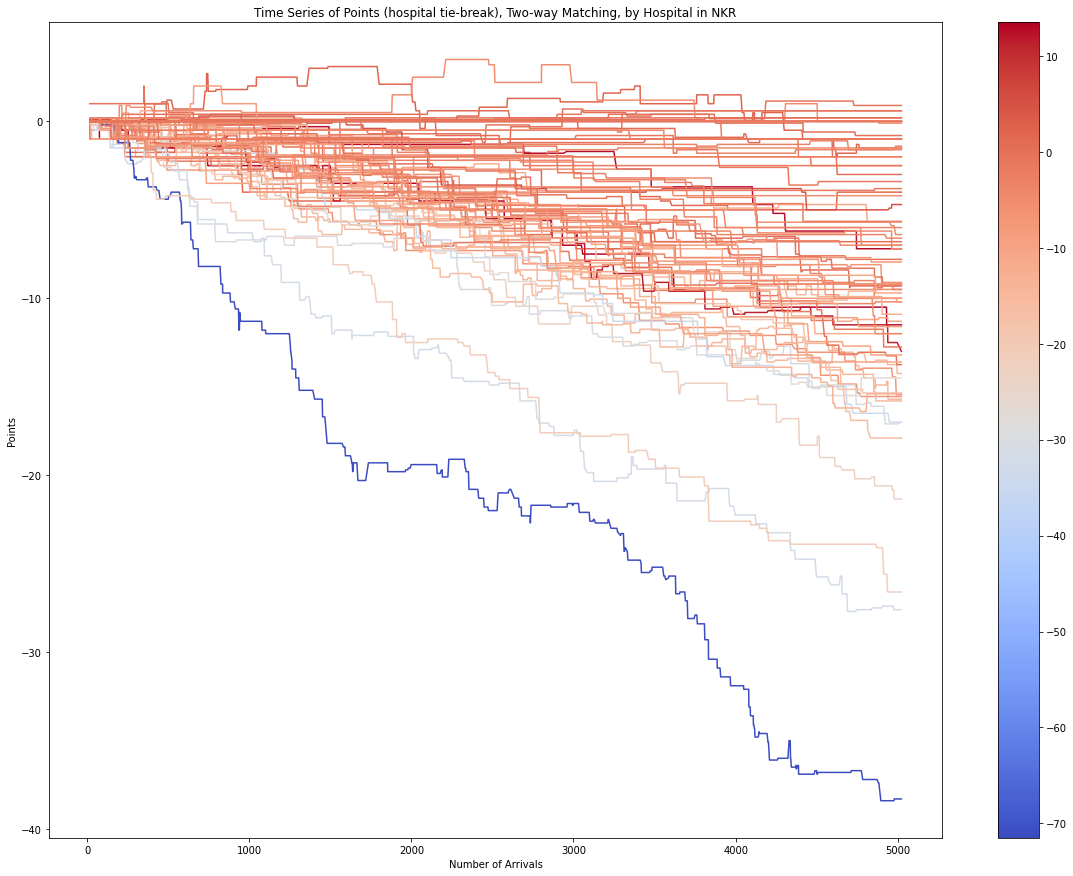

In [31]:
cmap = plt.cm.coolwarm
norm = colors.Normalize()

hospitals_ts.iloc[1:].plot.line(figsize = (20, 15), legend = False, color=cmap(norm(hospitals_ts.loc['points'])))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm)

plt.xlabel("Number of Arrivals")
plt.ylabel("Points")
plt.title("Time Series of Points (hospital tie-break), Two-way Matching, by Hospital in NKR")
plt.show()

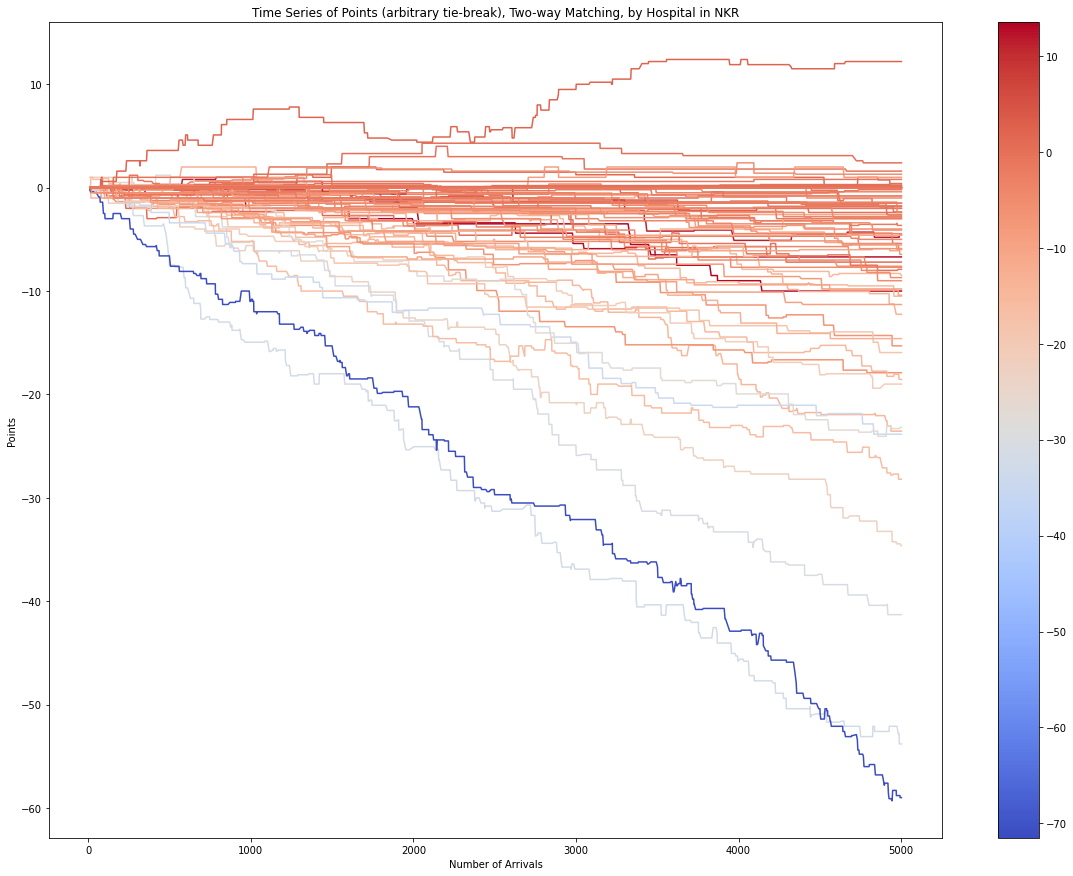

In [32]:
hospitals_ts_a.loc['points'] = ke_nkr_hospital
hospitals_ts_a.iloc[1:].plot.line(figsize = (20, 15), legend = False, color=cmap(norm(hospitals_ts_a.loc['points'])))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm)

plt.xlabel("Number of Arrivals")
plt.ylabel("Points")
plt.title("Time Series of Points (arbitrary tie-break), Two-way Matching, by Hospital in NKR")
plt.show()

#### Color-coded by ratio

In [37]:
ke_nkr_pts['positive_pts'] = (ke_nkr_pts.points >= 0)
ke_nkr_hospital = ke_nkr_pts.groupby('hospital_code').sum()['positive_pts'] / ke_nkr_pts.groupby('hospital_code').count()['positive_pts']
ke_nkr_hospital

hospital_code
           0.588235
CACH-TX    0.000000
CACS-TX    0.000000
CAGH-TX    0.000000
CALL-TX    0.117647
             ...   
VTMC-TX    0.666667
WAUW-TX    0.409091
WISE-TX    0.333333
WISL-TX    0.666667
WIUW-TX    0.339450
Name: positive_pts, Length: 81, dtype: float64

In [38]:
ke_nkr_hospital = ke_nkr_hospital.reindex(ke_nkr_pts.hospital_code.unique())

In [39]:
hospitals_ts.loc['points'] = ke_nkr_hospital
hospitals_ts

CASF-TX    CASH-TX    COPM-TX    UTMC-TX    PAUP-TX    PAAG-TX  \
points      0.4   0.333333   0.461538   0.421053   0.318182   0.342857   
16          0.0   0.000000   0.000000   0.000000   0.000000   0.000000   
17          0.0   0.000000   0.000000   0.000000   0.000000   0.000000   
19          0.0  -0.500000   0.000000   0.000000   0.000000   0.000000   
28          0.0  -0.500000   0.000000   0.000000   0.000000   0.000000   
...         ...        ...        ...        ...        ...        ...   
4987      -15.7 -15.550000 -11.500000 -10.000000 -15.800000 -14.450000   
4991      -15.7 -15.550000 -11.500000 -10.000000 -15.800000 -15.450000   
4995      -15.7 -15.550000 -11.500000 -10.000000 -15.800000 -15.450000   
4997      -15.7 -15.550000 -11.500000 -10.000000 -15.800000 -15.450000   
5023      -15.7 -15.550000 -11.500000 -10.000000 -15.800000 -15.450000   

         TXMH-TX    GAEM-TX    MDUM-TX   TNMH-TX  ...  ILUI-TX   VAUV-TX  \
points  0.391304   0.411765   0.271429  0.473684  ...      0.0  0.555556   
16      0.000000   0.000000   0.000000  0.000000  ...      0.0  0.000000   
17      0.000000   0.000000   0.000000  0.000000  ...      0.0  0.000000   
19      0.000000   0.000000   0.000000  0.000000  ...      0.0  0.000000   
28      0.000000   0.000000   0.000000  0.000000  ...      0.0  0.000000   
...          ...        ...        ...       ...  ...      ...       ...   
4987   -9.300000 -13.750000 -21.350000  0.900000  ...     -2.0 -1.400000   
4991   -9.300000 -13.750000 -21.350000  0.900000  ...     -2.0 -1.400000   
4995   -9.300000 -13.750000 -21.350000  0.900000  ...     -2.0 -1.400000   
4997   -9.300000 -14.250000 -21.350000  0.900000  ...     -2.0 -1.400000   
5023   -9.300000 -14.250000 -21.350000  0.900000  ...     -2.0 -1.400000   

        ORGS-TX  CASC-TX  TXHS-TX  GAMC-TX  CACS-TX  NVUM-TX  CACH-TX  CAGH-TX  
points      0.5     0.25      1.0     0.20      0.0      1.0      0.0      0.0  
16          0.0     0.00      0.0     0.00      0.0      0.0      0.0      0.0  
17          0.0     0.00      0.0     0.00      0.0      0.0      0.0      0.0  
19          0.0     0.00      0.0     0.00      0.0      0.0      0.0      0.0  
28          0.0     0.00      0.0     0.00      0.0      0.0      0.0      0.0  
...         ...      ...      ...      ...      ...      ...      ...      ...  
4987        0.0    -1.00      0.2    -5.65     -1.5      0.2      0.0      0.0  
4991        0.0    -1.00      0.2    -5.65     -1.5      0.2      0.0      0.0  
4995        0.0    -1.00      0.2    -5.65     -1.5      0.2      0.0      0.0  
4997        0.0    -1.00      0.2    -5.65     -1.5      0.2      0.0      0.0  
5023        0.0    -1.00      0.2    -5.65     -1.5      0.2      0.0      0.0  

[1141 rows x 81 columns]

Color-coded by fraction of all pairs that have positive points:

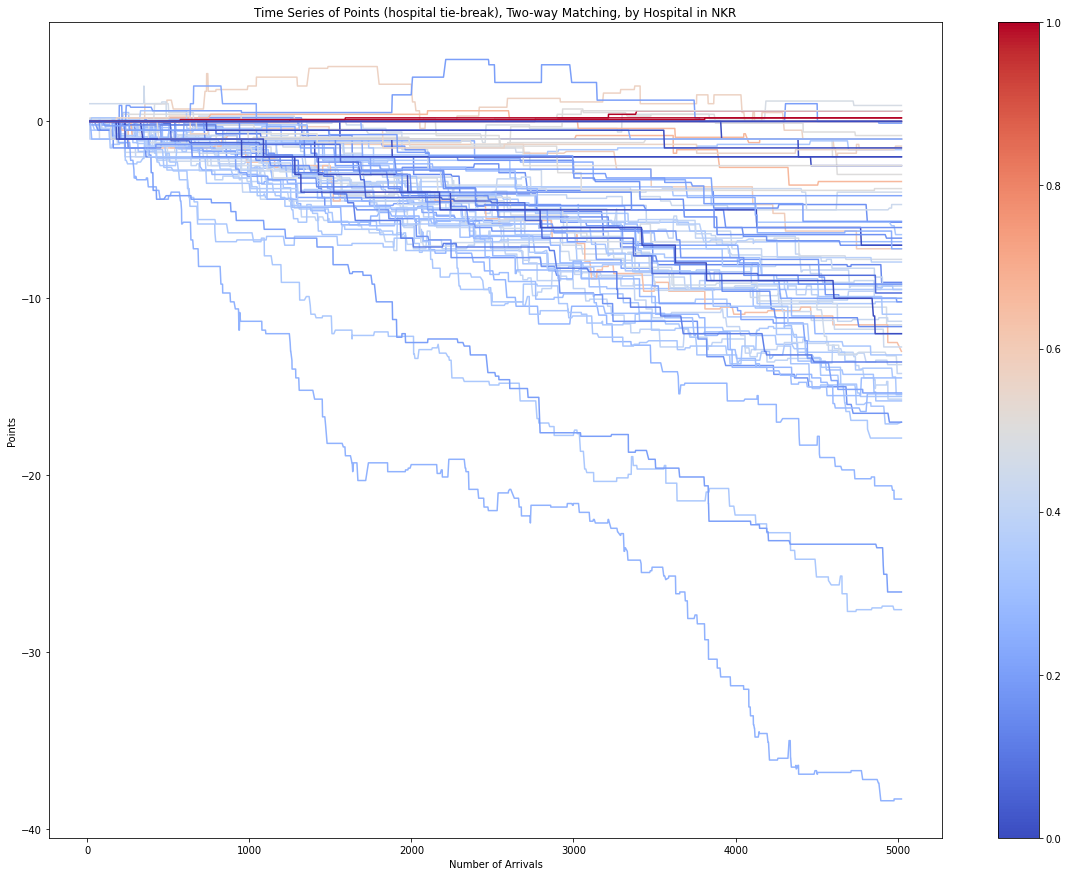

In [42]:
cmap = plt.cm.coolwarm
norm = colors.Normalize()

hospitals_ts.iloc[1:].plot.line(figsize = (20, 15), legend = False, color=cmap(norm(hospitals_ts.loc['points'])))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm)

plt.xlabel("Number of Arrivals")
plt.ylabel("Points")
plt.title("Time Series of Points (hospital tie-break), Two-way Matching, by Hospital in NKR")
plt.show()

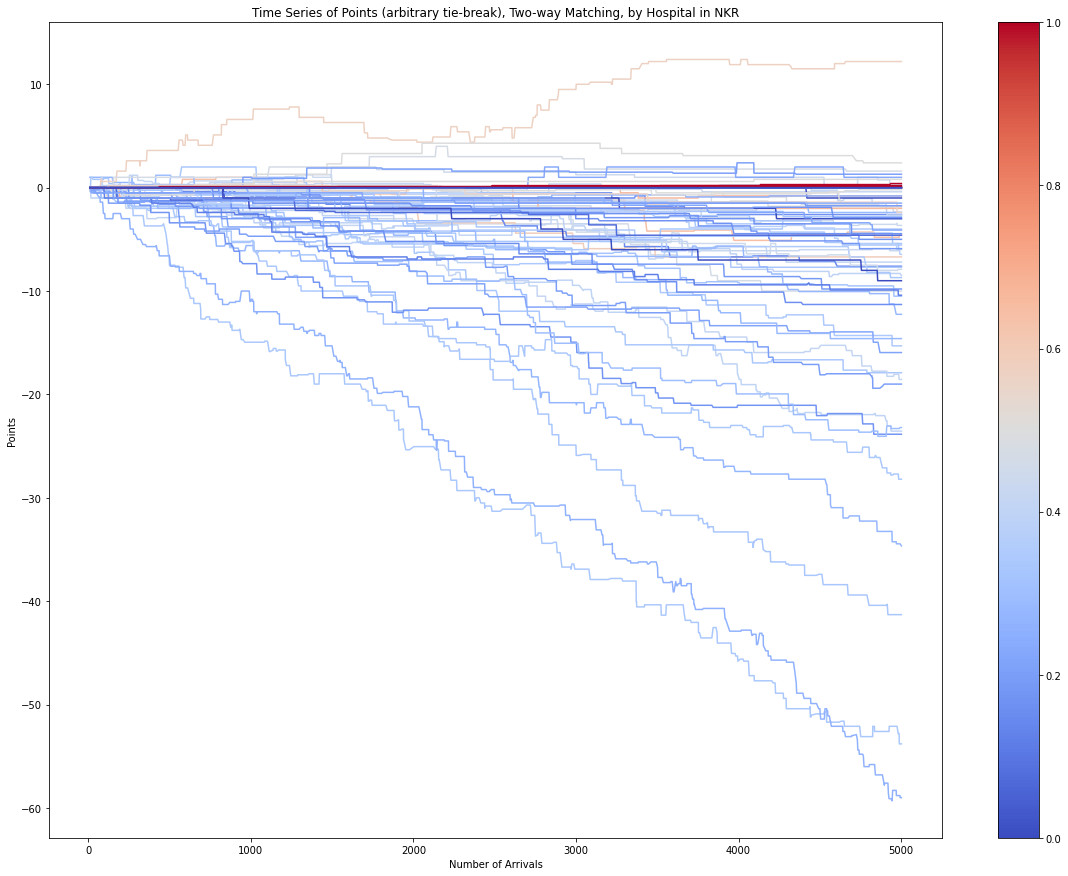

In [43]:
hospitals_ts_a.loc['points'] = ke_nkr_hospital
hospitals_ts_a.iloc[1:].plot.line(figsize = (20, 15), legend = False, color=cmap(norm(hospitals_ts_a.loc['points'])))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm)

plt.xlabel("Number of Arrivals")
plt.ylabel("Points")
plt.title("Time Series of Points (arbitrary tie-break), Two-way Matching, by Hospital in NKR")
plt.show()

## Archived: Previous Point Tables

![Point system](point_system.png)

In [13]:
points = pd.DataFrame(list(itertools.product(['O', 'A', 'B', 'AB', np.nan], repeat=2)), columns=['donor', 'patient'])
points = points[points.donor.notna()]
points

donor patient
0      O       O
1      O       A
2      O       B
3      O      AB
4      O     NaN
5      A       O
6      A       A
7      A       B
8      A      AB
9      A     NaN
10     B       O
11     B       A
12     B       B
13     B      AB
14     B     NaN
15    AB       O
16    AB       A
17    AB       B
18    AB      AB
19    AB     NaN

In [14]:
# if they fall in the bucket (pra_lower, pra_upper]
points['pra_lower'] = -1
points['pra_upper'] = 100

# Altruistic donors
points.loc[(points.donor == 'O') & (points.patient.isna()), 'points'] = 2750
points.loc[(points.donor != 'O') & (points.patient.isna()), 'points'] = 1000

points

donor patient  pra_lower  pra_upper  points
0      O       O         -1        100     NaN
1      O       A         -1        100     NaN
2      O       B         -1        100     NaN
3      O      AB         -1        100     NaN
4      O     NaN         -1        100  2750.0
5      A       O         -1        100     NaN
6      A       A         -1        100     NaN
7      A       B         -1        100     NaN
8      A      AB         -1        100     NaN
9      A     NaN         -1        100  1000.0
10     B       O         -1        100     NaN
11     B       A         -1        100     NaN
12     B       B         -1        100     NaN
13     B      AB         -1        100     NaN
14     B     NaN         -1        100  1000.0
15    AB       O         -1        100     NaN
16    AB       A         -1        100     NaN
17    AB       B         -1        100     NaN
18    AB      AB         -1        100     NaN
19    AB     NaN         -1        100  1000.0

In [15]:
# Overdemanded (donor is O)
points.loc[(points.donor == 'O') & (points.patient == 'A'), ['pra_upper', 'points']] = [30, 1000]
points.loc[(points.donor == 'O') & (points.patient.isin(['B', 'AB'])), ['pra_upper', 'points']] = [30, 500]

under = ['A', 'B', 'AB']
for abo in under:
    points = points.append({'donor': 'O', 'patient': abo, 'pra_lower': 30, 'pra_upper': 100, 'points': 0}, 
                           ignore_index=True)

points

donor patient  pra_lower  pra_upper  points
0      O       O         -1        100     NaN
1      O       A         -1         30  1000.0
2      O       B         -1         30   500.0
3      O      AB         -1         30   500.0
4      O     NaN         -1        100  2750.0
5      A       O         -1        100     NaN
6      A       A         -1        100     NaN
7      A       B         -1        100     NaN
8      A      AB         -1        100     NaN
9      A     NaN         -1        100  1000.0
10     B       O         -1        100     NaN
11     B       A         -1        100     NaN
12     B       B         -1        100     NaN
13     B      AB         -1        100     NaN
14     B     NaN         -1        100  1000.0
15    AB       O         -1        100     NaN
16    AB       A         -1        100     NaN
17    AB       B         -1        100     NaN
18    AB      AB         -1        100     NaN
19    AB     NaN         -1        100  1000.0
20     O       A         30        100     0.0
21     O       B         30        100     0.0
22     O      AB         30        100     0.0

In [16]:
# Underdemanded (donor is A, B, AB and patient is O)
for abo in under:
    points.loc[(points.donor == abo) & (points.patient == 'O'), 'points'] = -1000
points

donor patient  pra_lower  pra_upper  points
0      O       O         -1        100     NaN
1      O       A         -1         30  1000.0
2      O       B         -1         30   500.0
3      O      AB         -1         30   500.0
4      O     NaN         -1        100  2750.0
5      A       O         -1        100 -1000.0
6      A       A         -1        100     NaN
7      A       B         -1        100     NaN
8      A      AB         -1        100     NaN
9      A     NaN         -1        100  1000.0
10     B       O         -1        100 -1000.0
11     B       A         -1        100     NaN
12     B       B         -1        100     NaN
13     B      AB         -1        100     NaN
14     B     NaN         -1        100  1000.0
15    AB       O         -1        100 -1000.0
16    AB       A         -1        100     NaN
17    AB       B         -1        100     NaN
18    AB      AB         -1        100     NaN
19    AB     NaN         -1        100  1000.0
20     O       A         30        100     0.0
21     O       B         30        100     0.0
22     O      AB         30        100     0.0

In [17]:
# O patient to O donor
points.loc[(points.donor == 'O') & (points.patient == 'O'), ['pra_upper', 'points']] = [30, 90]
points = points.append({'donor': 'O', 'patient': 'O', 'pra_lower': 30, 'pra_upper': 90, 'points': -250}, 
                           ignore_index=True)
points = points.append({'donor': 'O', 'patient': 'O', 'pra_lower': 90, 'pra_upper': 100, 'points': -500}, 
                           ignore_index=True)
points

donor patient  pra_lower  pra_upper  points
0      O       O         -1         30    90.0
1      O       A         -1         30  1000.0
2      O       B         -1         30   500.0
3      O      AB         -1         30   500.0
4      O     NaN         -1        100  2750.0
5      A       O         -1        100 -1000.0
6      A       A         -1        100     NaN
7      A       B         -1        100     NaN
8      A      AB         -1        100     NaN
9      A     NaN         -1        100  1000.0
10     B       O         -1        100 -1000.0
11     B       A         -1        100     NaN
12     B       B         -1        100     NaN
13     B      AB         -1        100     NaN
14     B     NaN         -1        100  1000.0
15    AB       O         -1        100 -1000.0
16    AB       A         -1        100     NaN
17    AB       B         -1        100     NaN
18    AB      AB         -1        100     NaN
19    AB     NaN         -1        100  1000.0
20     O       A         30        100     0.0
21     O       B         30        100     0.0
22     O      AB         30        100     0.0
23     O       O         30         90  -250.0
24     O       O         90        100  -500.0

In [18]:
# same blood type, non-O
points.loc[(points.donor == points.patient) & (points.donor != 'O'), ['pra_upper', 'points']] = [30, -250]
for abo in under:
    points = points.append({'donor': abo, 'patient': abo, 'pra_lower': 30, 'pra_upper': 100, 'points': -750}, 
                           ignore_index=True)

In [19]:
points.loc[(points.patient == 'A') & (points.donor == 'B'), 'points'] = 0
points.loc[(points.patient == 'B') & (points.donor == 'A'), 'points'] = -500
points

donor patient  pra_lower  pra_upper  points
0      O       O         -1         30    90.0
1      O       A         -1         30  1000.0
2      O       B         -1         30   500.0
3      O      AB         -1         30   500.0
4      O     NaN         -1        100  2750.0
5      A       O         -1        100 -1000.0
6      A       A         -1         30  -250.0
7      A       B         -1        100  -500.0
8      A      AB         -1        100     NaN
9      A     NaN         -1        100  1000.0
10     B       O         -1        100 -1000.0
11     B       A         -1        100     0.0
12     B       B         -1         30  -250.0
13     B      AB         -1        100     NaN
14     B     NaN         -1        100  1000.0
15    AB       O         -1        100 -1000.0
16    AB       A         -1        100     NaN
17    AB       B         -1        100     NaN
18    AB      AB         -1         30  -250.0
19    AB     NaN         -1        100  1000.0
20     O       A         30        100     0.0
21     O       B         30        100     0.0
22     O      AB         30        100     0.0
23     O       O         30         90  -250.0
24     O       O         90        100  -500.0
25     A       A         30        100  -750.0
26     B       B         30        100  -750.0
27    AB      AB         30        100  -750.0

There are still some rows with NaNs - not specified in the point menu, but because they're underdemanded pairs, I'm going to assume -1000 points.

In [20]:
points.points = points.points.fillna(-1000)
points

donor patient  pra_lower  pra_upper  points
0      O       O         -1         30    90.0
1      O       A         -1         30  1000.0
2      O       B         -1         30   500.0
3      O      AB         -1         30   500.0
4      O     NaN         -1        100  2750.0
5      A       O         -1        100 -1000.0
6      A       A         -1         30  -250.0
7      A       B         -1        100  -500.0
8      A      AB         -1        100 -1000.0
9      A     NaN         -1        100  1000.0
10     B       O         -1        100 -1000.0
11     B       A         -1        100     0.0
12     B       B         -1         30  -250.0
13     B      AB         -1        100 -1000.0
14     B     NaN         -1        100  1000.0
15    AB       O         -1        100 -1000.0
16    AB       A         -1        100 -1000.0
17    AB       B         -1        100 -1000.0
18    AB      AB         -1         30  -250.0
19    AB     NaN         -1        100  1000.0
20     O       A         30        100     0.0
21     O       B         30        100     0.0
22     O      AB         30        100     0.0
23     O       O         30         90  -250.0
24     O       O         90        100  -500.0
25     A       A         30        100  -750.0
26     B       B         30        100  -750.0
27    AB      AB         30        100  -750.0

In [66]:
points.points.replace({0: -5}, inplace=True)

In [67]:
ke_nkr_points = ke_nkr.merge(points, how='left', 
                             left_on = ['abo_donor', 'abo_patient'], right_on = ['donor', 'patient'], validate='m:m')
ke_nkr_points = ke_nkr_points.loc[(ke_nkr_points.pra.isna()) | 
                                  ((ke_nkr_points.pra <= ke_nkr_points.pra_upper) & 
                                   (ke_nkr_points.pra > ke_nkr_points.pra_lower))]
ke_nkr_points

id hospital_code abo_donor abo_patient   pra platform_code donor  \
0        0       CASF-TX         A         NaN   NaN           NKR     A   
1        1       CASH-TX         B         NaN   NaN           NKR     B   
2        2       COPM-TX         O         NaN   NaN           NKR     O   
3        3       UTMC-TX         O         NaN   NaN           NKR     O   
4        4       PAUP-TX         O         NaN   NaN           NKR     O   
...    ...           ...       ...         ...   ...           ...   ...   
2933  1894       PAUP-TX         A           O   0.0           NKR     A   
2934  1895       MDUM-TX        AB           O   0.0           NKR    AB   
2936  1896       PAHH-TX         A           A  90.6           NKR     A   
2937  1897       MDUM-TX         B           O   0.0           NKR     B   
2938  1898       DCWR-TX         B           O  99.6           NKR     B   

     patient  pra_lower  pra_upper  points  
0        NaN         -1        100  1000.0  
1        NaN         -1        100  1000.0  
2        NaN         -1        100  2750.0  
3        NaN         -1        100  2750.0  
4        NaN         -1        100  2750.0  
...      ...        ...        ...     ...  
2933       O         -1        100 -1000.0  
2934       O         -1        100 -1000.0  
2936       A         30        100  -750.0  
2937       O         -1        100 -1000.0  
2938       O         -1        100 -1000.0  

[1899 rows x 11 columns]

In [68]:
ke_nkr_points.drop(columns = ['donor', 'patient', 'pra_lower', 'pra_upper'], inplace=True)
ke_nkr_points.head()

id hospital_code abo_donor abo_patient  pra platform_code  points
0   0       CASF-TX         A         NaN  NaN           NKR  1000.0
1   1       CASH-TX         B         NaN  NaN           NKR  1000.0
2   2       COPM-TX         O         NaN  NaN           NKR  2750.0
3   3       UTMC-TX         O         NaN  NaN           NKR  2750.0
4   4       PAUP-TX         O         NaN  NaN           NKR  2750.0

In [69]:
ke_nkr_points.reset_index(inplace=True)

# Archived: Generating arrivals / departures without matching

In [ ]:
def gen_arrival_time(num_arrivals_goal):
    q = Queue(arrival_rate=200, departure_rate=1, compatibility=matrix, values=np.ones((len(matrix), len(matrix))),
         ids = list(ke_nkr.id))
    q.generate_arrivals_departures(num_arrivals_goal)

    start_time = datetime.now()
    print("generating pool...")

    while q.num_arrivals < num_arrivals_goal:
        q.test_arrivals_departures()
        
        if q.num_arrivals % 10000 == 0:
            end_time = datetime.now()
            print("time for ", q.num_arrivals, "arrivals: ", end_time - start_time)
            print("pool length", len(q.current))
#         if q.num_arrivals % 1000 == 0:
#             print(len(q.current), "pool size")
    end_time = datetime.now()
    print("time for ", q.num_arrivals, "arrivals: ", end_time - start_time)
    print(len(q.current))
    return q

# for num in [1000, 10000, 100000]:
#     gen_arrival_time(num)
gen_arrival_time(3000)

## Checking time efficiency

In [ ]:
num_simulations = 50
num_generate = 200000
num_matches_goal = 500 

def sim_times(n_sim, n_generate, n_matches_goal, alt=True, threes=True):
    total_times = []
    n_arrivals = []

    for i in range(num_simulations):
        
        q = Queue(arrival_rate=200, departure_rate=1, compatibility=matrix, values=np.ones((len(matrix), len(matrix))),
                     ids = list(ke_nkr.id))
        
        start_time = datetime.now()
        
        q.generate_arrivals_departures(num_generate)

#         print("matching...")
    
        #number of matches is just length of match list, which undercounts number of actual pairs matched (tuples / threes)
        while len(q.matches) < num_matches_goal:
            q.next_greedy_match(alt, threes)

        end_time = datetime.now()
#         print("time for ", queue_init.num_arrivals, "arrivals and ", len(q.matches), "matches:", end_time - start_time)
        total_times.append((end_time - start_time).total_seconds())
        n_arrivals.append(q.num_arrivals)
        
    return((np.mean(total_times), np.mean(n_arrivals)))

# sim_times(num_simulations, num_generate, num_matches_goal)

In [ ]:
# only three and two cycles
sim_times(num_simulations, num_generate, num_matches_goal, alt=False)

In [ ]:
# only two ways
sim_times(num_simulations, num_generate, num_matches_goal, alt=False, threes=False)

In [ ]:
# only altruistic and twos
sim_times(num_simulations, num_generate, num_matches_goal, alt=True, threes=False)

## Test outcomes
For 100 matches

In [34]:
q = Queue(arrival_rate=200, departure_rate=1, compatibility=matrix, values=np.ones((len(matrix), len(matrix))),
          hospital = hospitals, pairs = ke_nkr_points)
        
start_time = datetime.now()
        
q.generate_arrivals_departures(100000)

#         print("matching...")
    
        #number of matches is just length of match list, which undercounts number of actual pairs matched (tuples / threes)
while len(q.matches) < 100:
    q.next_greedy_match(False, False)

end_time = datetime.now()
#         print("time for ", queue_init.num_arrivals, "arrivals and ", len(q.matches), "matches:", end_time - start_time)

[663]
[1855, 1684]
[1855, 1140]
[514]
[1275, 240]
[285, 1855, 1651, 330, 240, 1754, 983, 558, 997, 419, 245]
[997, 517, 1267]
[1651, 983]
[558, 245]
[1174]
[333]
[1651]
[401, 1117, 785]
[1507]
[1369]
[997, 1267, 1442, 1079, 434]
[330, 427, 1912, 401]
[1303, 330, 1840, 1754, 427, 401, 245, 1675, 1267, 250, 1333, 842, 1314, 1138, 1291, 1442, 1079, 762, 306, 769, 987, 964, 434, 1682, 785, 1834]
[1725]
[1720]
[330, 1754, 245, 1267, 250, 662, 842, 1314, 1291, 1079, 762, 306, 987, 1682, 785, 637, 358, 241, 1634, 610, 633]
[785]
[330, 1754, 245, 1267, 842, 1314, 1291, 1442, 1079, 762, 987, 434, 1682, 481, 1507, 241, 1634, 610]
[330, 1442, 481, 241, 610, 373, 1217]
[1079, 434, 1217]
[285, 1267, 1079, 434, 241]
[1267, 434, 241]
[245, 842, 1314, 1869, 1138, 1291, 1442, 1079, 762, 434, 481, 241, 610, 1390, 383, 1661, 430, 1656]
[1442, 1079, 514, 434, 241]
[1390]
[430]
[245, 1314, 1291, 1442, 1079, 762, 434, 481, 637, 241, 610, 1661, 1656, 943, 363, 1683]
[1442, 1079, 512, 434, 241]
[1479]
[245, 1

In [35]:
q.num_transplants

200

In [36]:
q.num_arrivals

582

In [29]:
len(q.current)

34

In [ ]:
q = Queue(arrival_rate=200, departure_rate=1, compatibility=matrix, values=np.ones((len(matrix), len(matrix))),
          hospital = hospitals, pairs = ke_nkr_points)
        
start_time = datetime.now()
        
q.generate_arrivals_departures(100000)

while len(q.matches) < 100:
    q.next_greedy_match(True, False)

end_time = datetime.now()
#         print("time for ", queue_init.num_arrivals, "arrivals and ", len(q.matches), "matches:", end_time - start_time)

In [ ]:
len(q.matches)

In [ ]:
q.num_arrivals

In [ ]:
len(q.current)